<a href="https://colab.research.google.com/github/arthurperalta/forecastexpacu/blob/master/Forecast_de_Exporta%C3%A7%C3%A3o_do_NCM_17011400_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Forecast de Exportação do NCM 17011400 - "Outros Açúcares de Cana" no Estado de São Paulo**

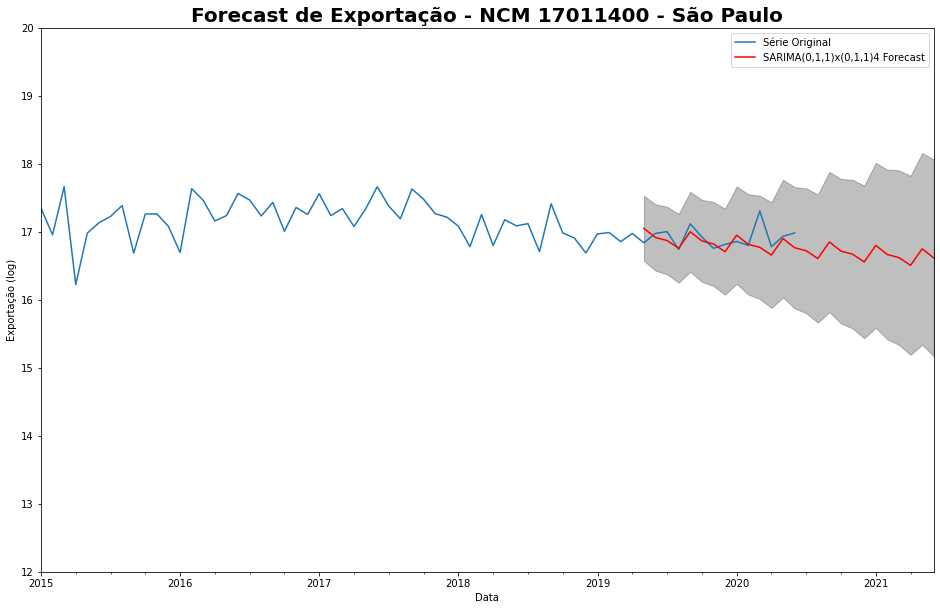

Olá, tudo bem?

Meu nome é Arthur Henrique Peralta ([LinkedIn](https://www.linkedin.com/in/arthurperalta/)), tenho 23 anos e estou no último semestre do curso de Economia.

Com este projeto estou aplicando os conceitos e aprendizados que absorvi durante o curso da **Data Science Academy**, **Formação Cientista de Dados**


Este projeto visa a predição, com o melhor trade off entre RMSE (Erro Quadrático Médio) e AIC (Critério de informação de Akaike) possível, da exportação do NCM 17011400 no Estado de São Paulo. 

As bases de dados utilizadas podem ser encontrada no site do [Ministério da Economia](http://www.mdic.gov.br/index.php/comercio-exterior/estatisticas-de-comercio-exterior/base-de-dados-do-comercio-exterior-brasileiro-arquivos-para-download).


###**Contextualização do Problema**
Utilizando os dados históricos, iremos buscar o melhor modelo de séries temporais para predizer como a exportação do NCM 17011400 ficará do mês de Julho de 2020 à Julho de 2021. Com este Projeto iremos conseguir observar como será a exportação, do item supracitado, pós pico da pandemia no Estado de São Paulo.

Os modelos utilizados serão: **ARIMA,SARIMA e Prophet**(Biblioteca criada pelo Facebook para Séries Temporais).

O Modelo escolhido para a predição será o que obtiver o menor RMSE nos dados de teste.


##**Primeiro Passo**

Vamos começar instalando, importando e atualizando as bibliotecas que serão utilizadas

In [ ]:
#Instalando o Prophet
!pip install -q fbprophet

In [ ]:
#Atualizando o StatsModels
!pip install -q -U statsmodels

     |████████████████████████████████| 8.7MB 2.7MB/s 


In [ ]:
#Instalando pmdarima
!pip install -q pmdarima

     |████████████████████████████████| 1.5MB 2.9MB/s 
     |████████████████████████████████| 2.1MB 14.6MB/s 


In [ ]:
# Importando as bibliotecas de manipulação de dados
import pandas as pd
import numpy as np
import itertools

# Importando as bibliotecas de visualização de dados
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Importando as bibliotecas utilizadas para modelagem preditiva
import statsmodels
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.stats as sms
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from fbprophet import Prophet

# Importando biblioteca utilizada para métrica de avaliação do modelo
from sklearn.metrics import mean_squared_error

# Filtrando mensagens de avisos
import warnings
warnings.filterwarnings('ignore')
import sys

##**Segundo Passo**

Agora iremos importar os dados utilizando a biblioteca *Pandas*.

O dataset utilizado foi atualizado pela última vez no mês de Junho de 2020, e servirá de base histórica para nossas predições. No site do Ministério da Economia podemos encontrar os datasets ano por ano ou um dataset que contém os dados históricos de 1997 à junho de 2020.

Os dados históricos que iremos utilizar é do ano de 2015 em diante, iremos importar ano por ano e depois fazer um "merge" e juntar tudo em apenas um Dataframe.

>OBS: Como os datasets são de exportações do Brasil inteiro, pode demorar um pouco para importar.(~~Isso não foi uma piadinha rsrs~~)



In [ ]:
ano2015 = pd.read_csv('http://www.mdic.gov.br/balanca/bd/comexstat-bd/ncm/EXP_2015.csv', sep = ';')
ano2016 = pd.read_csv('http://www.mdic.gov.br/balanca/bd/comexstat-bd/ncm/EXP_2016.csv', sep = ';')
ano2017 = pd.read_csv('http://www.mdic.gov.br/balanca/bd/comexstat-bd/ncm/EXP_2017.csv', sep = ';')
ano2018 = pd.read_csv('http://www.mdic.gov.br/balanca/bd/comexstat-bd/ncm/EXP_2018.csv', sep = ';')
ano2019 = pd.read_csv('http://www.mdic.gov.br/balanca/bd/comexstat-bd/ncm/EXP_2019.csv', sep = ';')
ano2020 = pd.read_csv('http://www.mdic.gov.br/balanca/bd/comexstat-bd/ncm/EXP_2020.csv', sep = ';')

#Futuras atualizações podem atrapalhar a replicação do projeto, irei usar o Pandas para evitar que isso ocorra
ano2020 = ano2020[ano2020['CO_MES'] <= 6]

Vamos averiguar se está tudo ok com nossos datasets importados, e se estiver, continuaremos para a próxima etapa.

In [ ]:
ano2015.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,2015,4,74153300,10,607,SC,1,927800,8,8,244
1,2015,4,19053200,10,474,SP,1,817800,17646,17646,40485
2,2015,4,85115010,11,756,SP,1,817800,34,202,7279
3,2015,4,15200010,10,160,RS,1,717800,497290,497290,114179
4,2015,12,84219999,10,63,MN,7,1010900,2452,2452,117073


In [ ]:
ano2016.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,2016,9,74111010,10,169,SP,1,817800,15720,15720,77026
1,2016,11,62045200,11,249,SC,4,817600,11,4,530
2,2016,11,61062000,11,249,RJ,4,817700,42,5,459
3,2016,11,29161320,10,586,SP,7,910600,200,200,378
4,2016,11,85013110,11,196,RS,1,817800,103,133,2499


In [ ]:
ano2017.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,2017,7,84806000,11,586,SP,7,910600,115,481,9962
1,2017,7,84629199,11,586,SP,7,910600,3,1188,3021
2,2017,7,84509090,10,586,SP,7,910600,2317,2317,23974
3,2017,7,23099090,10,845,SP,1,817800,394400,394400,229011
4,2017,1,84099190,10,467,RS,4,817700,5,5,1905


In [ ]:
ano2018.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,2018,8,73182400,10,23,SP,1,817800,492,34,1363
1,2018,3,19053100,10,845,SC,7,1010252,10575,10575,13582
2,2018,3,87141000,10,23,ND,4,227700,31,31,195
3,2018,3,39199090,10,63,MG,7,1017503,5687,5687,30121
4,2018,8,41044130,15,190,RS,1,1017700,9581,13110,101826


In [ ]:
ano2019.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,2019,8,68029390,10,196,ES,1,717600,122148,122148,57369
1,2019,6,46019300,10,97,SC,7,147600,42,42,488
2,2019,4,38099211,10,63,PR,7,1017500,28240,28240,23722
3,2019,2,27090010,16,249,SP,1,710400,163020,142136555,55467656
4,2019,2,74199990,10,97,SP,7,147600,1171,1165,35530


In [ ]:
ano2020.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,2020,2,40082900,10,63,SP,7,1017504,109,109,1242
1,2020,6,12092900,10,169,BA,1,517800,25000,25000,31651
2,2020,2,73261900,10,589,SP,4,817700,451,424,3342
3,2020,5,39219090,10,845,SP,7,1017701,1260,1260,7698
5,2020,5,85322590,11,399,RS,0,817700,647072,654,23860


Aparentemente está tudo ok, vamos ver o *shape* dos dados importados e se há valores nulos.

In [ ]:
for i,j in zip([ano2015,ano2016,ano2017,ano2018,ano2019,ano2020], [2015,2016,2017,2018,2019,2020]):
  print('\nO dataset do ano {}, possui {} linhas e {} colunas'.format(j,i.shape[0], i.shape[1]))


O dataset do ano 2015, possui 1048570 linhas e 11 colunas

O dataset do ano 2016, possui 1092852 linhas e 11 colunas

O dataset do ano 2017, possui 1096765 linhas e 11 colunas

O dataset do ano 2018, possui 1168283 linhas e 11 colunas

O dataset do ano 2019, possui 1416883 linhas e 11 colunas

O dataset do ano 2020, possui 652965 linhas e 11 colunas


Podemos observar que o dataset de 2020 há menos linhas, isso se deve ao fato de termos apenas 1 semestre nesse dataset, que está atualizado até o final de Junho de 2020.

In [ ]:
for i,j in zip([ano2015,ano2016,ano2017,ano2018,ano2019,ano2020], [2015,2016,2017,2018,2019,2020]):
  print('\nO dataset do ano {}, possui {} linhas com valores nulos'.format(j,i.isnull().sum().sum()))


O dataset do ano 2015, possui 0 linhas com valores nulos

O dataset do ano 2016, possui 0 linhas com valores nulos

O dataset do ano 2017, possui 0 linhas com valores nulos

O dataset do ano 2018, possui 0 linhas com valores nulos

O dataset do ano 2019, possui 0 linhas com valores nulos

O dataset do ano 2020, possui 0 linhas com valores nulos


Os datasets também não possuem nenhuma linha com valor nulo.

Agora temos que fazer o *merge* de todos eles, fazendo com que virem apenas 1 DataFrame, assim para trabalharmos ficará muito mais fácil.
Iremos fazer o merge com a função ***concat*** do Pandas.

In [ ]:
df = pd.concat([ano2015,ano2016,ano2017,ano2018,ano2019,ano2020], axis = 0)

In [ ]:
df.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,2015,4,74153300,10,607,SC,1,927800,8,8,244
1,2015,4,19053200,10,474,SP,1,817800,17646,17646,40485
2,2015,4,85115010,11,756,SP,1,817800,34,202,7279
3,2015,4,15200010,10,160,RS,1,717800,497290,497290,114179
4,2015,12,84219999,10,63,MN,7,1010900,2452,2452,117073


In [ ]:
df.tail()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
774751,2020,3,48059300,10,586,PR,7,917500,50000,50000,31500
774752,2020,2,40112090,11,756,RJ,1,817800,862,11223,54659
774753,2020,2,40103100,10,741,SP,1,817800,49,49,2801
774754,2020,6,84219999,10,63,RS,7,1017503,12,12,111
774756,2020,2,90173020,11,589,RJ,4,717700,40,18,240


In [ ]:
df.shape

(6476318, 11)

Excelente, temos um DataFrame com a união de todos os anos, facilitando nosso trabalho para a análise exploratória e preditiva.

Antes de prosseguir, vamos ver se não acabamos criando algum valor nulo por acidente.

In [ ]:
df.isnull().sum()

CO_ANO        0
CO_MES        0
CO_NCM        0
CO_UNID       0
CO_PAIS       0
SG_UF_NCM     0
CO_VIA        0
CO_URF        0
QT_ESTAT      0
KG_LIQUIDO    0
VL_FOB        0
dtype: int64

Nenhum valor nulo.

Antes de terminar essa parte, podemos adicionar algumas variáveis ao nosso dataframe que ajudarão a entender melhor os dados na parte de Análise Exploratória.

Para isso iremos adicionar algumas variáveis complementares que também estão disponíveis no site do [Ministério da Economia](http://www.mdic.gov.br/index.php/comercio-exterior/estatisticas-de-comercio-exterior/base-de-dados-do-comercio-exterior-brasileiro-arquivos-para-download).


In [ ]:
#importação das variáveis complementares
pais = pd.read_csv('http://www.mdic.gov.br/balanca/bd/tabelas/PAIS.csv', sep = ';', encoding = "ISO-8859-1")
ncm = pd.read_csv('http://www.mdic.gov.br/balanca/bd/tabelas/NCM.csv', sep = ';', encoding = "ISO-8859-1")


In [ ]:
#shape dos dados
pais.shape, ncm.shape

((281, 6), (13111, 14))

In [ ]:
pais.head()

,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
0,0,898,ZZZ,Não Definido,Not defined,No definido
1,13,4,AFG,Afeganistão,Afghanistan,Afganistan
2,15,248,ALA,"Aland, Ilhas",Aland Islands,"Alans, Islas"
3,17,8,ALB,Albânia,Albania,Albania
4,20,724,ESP,"Alboran-Perejil, Ilhas","Alboran-Perejil, Islands","Alboran-Perejil, Islas"


In [ ]:
ncm.head()

,CO_NCM,CO_UNID,CO_SH6,CO_PPE,CO_PPI,CO_FAT_AGREG,CO_CUCI_ITEM,CO_CGCE_N3,CO_SIIT,CO_ISIC_CLASSE,CO_EXP_SUBSET,NO_NCM_POR,NO_NCM_ESP,NO_NCM_ING
0,38085910,10,380859,3293,3293,3,5919,322,2000,2021,1499.0,Outras mercadorias mencionadas na Nota de subp...,Otros productos mencionados en la nota de sub...,Other commodities mentioned in Note of subhead...
1,38085921,10,380859,3293,3293,3,5919,240,2000,2021,1499.0,Mercadorias à base de metamidofós (ISO) ou mon...,Productos basados en metamidofos (ISO) o monoc...,Commodities based on methamidophos (ISO) or mo...
2,38085922,10,380859,3293,3293,3,5919,240,2000,2021,1499.0,"Mercadorias à base de endossulfan (ISO), apres...","Productos sobre la base de endosulfán (ISO), p...","Commodities based on endosulfan (ISO), present..."
3,38085923,10,380859,3293,3293,3,5919,322,2000,2021,1499.0,"Mercadorias à base de alaclor (ISO), apresenta...","Productos sobre la base de alaclor (ISO), pres...","Commodities based on alachlor (ISO), presented..."
4,38085929,10,380859,3293,3293,3,5919,240,2000,2021,1499.0,"Mercadorias à base de outras substâncias, apre...",Las mercancías sobre la base de otras sustanci...,"Commodities based on other substances, present..."


Nesses 2 novos DataFrames que importamos precisamos de apenas algumas variáveis, a variável do código do NCM e do código do País para conseguir fazer o merge com o DataFrame principal, e o objeto do código do NCM e o objeto do código do país para podermos fazer uma análise exploratória melhor e que consiga transmitir uma melhor informação do que com os números que são usados no DataFrame principal.

No DataFrame "pais" precisamos do CO_PAIS e do NO_PAIS.

No DataFrame "ncm" precisamos do CO_NCM e do NO_NCM_POR.



In [ ]:
#Pegando apenas as variáveis necessárias
ncm = ncm[['CO_NCM','NO_NCM_POR']]
pais = pais[['CO_PAIS', 'NO_PAIS']]

In [ ]:
#Confirmar se as colunas estão certinhas
pais.columns, ncm.columns

(Index(['CO_PAIS', 'NO_PAIS'], dtype='object'),
 Index(['CO_NCM', 'NO_NCM_POR'], dtype='object'))

In [ ]:
#Para evitar perder o df que criamos vamos criar uma cópia em um novo DataFrame de backup
df_orig = df.copy()

In [ ]:
#Unir o objeto do NCM ao nosso DataFrame
df = pd.merge(df, ncm, on = 'CO_NCM')
df.shape[0] == df_orig.shape[0], df.shape

(True, (6476318, 12))

DataFrame com o mesmo número de linhas que o anterior porém com mais colunas, vamos verificar se foi criado algum valor nulo

In [ ]:
#Verificar valores nulos
df.isnull().sum().sum()

0

Tudo certo com nosso DataFrame, vamos agora colocar o nome do país em nosso DataFrame.

In [ ]:
#Merge
df = pd.merge(df,pais, on = 'CO_PAIS')

In [ ]:
#Conferir se está tudo certo no shape
df.shape[0] == df_orig.shape[0], df.shape

(True, (6476318, 13))

Tudo certo, não foi criado nenhuma linha a mais apenas adicionou uma coluna em nosso DataFrame igual nós queríamos.

Vamos conferir se não criamos nenhum valor nulo sem querer.

In [ ]:
#Verificar valores nulos
df.isnull().sum().sum()

0

Nenhum valor nulo, vamos verificar como nosso DataFrame ficou após essas alterações.

In [ ]:
df.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,NO_NCM_POR,NO_PAIS
0,2015,4,74153300,10,607,SC,1,927800,8,8,244,"Parafusos; pinos ou pernos e porcas, de cobre",Portugal
1,2015,6,74153300,10,607,SC,1,927800,6,6,246,"Parafusos; pinos ou pernos e porcas, de cobre",Portugal
2,2015,3,74153300,10,607,SC,1,927800,12,12,389,"Parafusos; pinos ou pernos e porcas, de cobre",Portugal
3,2015,2,74153300,10,607,SC,1,927800,61,61,2132,"Parafusos; pinos ou pernos e porcas, de cobre",Portugal
4,2015,7,74153300,10,607,SC,1,927800,9,9,477,"Parafusos; pinos ou pernos e porcas, de cobre",Portugal


Excelente, agora não temos apenas os códigos do NCM e do País, temos também os objetos destes, sendo mais fácil de compreender a nossa análise exploratória.

## **Terceiro Passo**

Estamos prontos para iniciar nossa Análise Exploratória, vamos começar entendendo o que cada variável significa conforme o site do Ministério da Economia.

As variáveis estão descritas a seguir:

- CO_ANO -> Ano da Exportação
- CO_MES -> Mês da Exportação
- CO_NCM -> Código NCM da Exportação
- CO_UNID -> Código da unidade estatística da Exportação
- CO_PAIS -> Código do País de destino da Exportação
- SG_UF_NCM -> Código da UF de origem do produto
- CO_VIA -> Código da via de transporte da Exportação
- CO_URF -> Código da URF de embarque
- QT_ESTAT ->  Quantidade estatística
- KG_LIQUIDO -> Quilograma Líquido
- VL_FOB -> Valor Free on Board em Dólar (US$)
- NO_NCM_POR -> Objeto representado pelo NCM
- NO_PAIS -> Nome do País




Agora que já sabemos o que cada variável significa, temos que ver se elas estão sendo representadas na categoria certa pelo Pandas, se os números estão como int ou float, e se as os textos estão como object  ou string. Para isso usaremos o ***info()***.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6476318 entries, 0 to 6476317
Data columns (total 13 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   CO_ANO      int64 
 1   CO_MES      int64 
 2   CO_NCM      int64 
 3   CO_UNID     int64 
 4   CO_PAIS     int64 
 5   SG_UF_NCM   object
 6   CO_VIA      int64 
 7   CO_URF      int64 
 8   QT_ESTAT    int64 
 9   KG_LIQUIDO  int64 
 10  VL_FOB      int64 
 11  NO_NCM_POR  object
 12  NO_PAIS     object
dtypes: int64(10), object(3)
memory usage: 691.7+ MB


Tudo bem aqui também, esse dataset não está difícil de entender nem de modelar. Demos sorte, porém há bastante para explorar antes de partir para o modelo de séries temporais.

Vamos começar buscando insights usando as estatísticas que a função ***describe*** oferece para nós.


In [ ]:
#Iremos utilizar o describe apenas nas variáveis quantitativas contínuas de nosso interesse
df[['KG_LIQUIDO', 'VL_FOB']].describe()

,KG_LIQUIDO,VL_FOB
count,6.476318e+06,6.476318e+06
mean,5.686430e+05,1.791011e+05
std,3.662101e+07,3.904902e+06
min,0.000000e+00,0.000000e+00
25%,5.000000e+00,1.760000e+02
50%,6.400000e+01,1.610000e+03
75%,2.029000e+03,1.777400e+04
max,1.546575e+10,1.644364e+09


Com o describe podemos observar a média de uma exportação tanto em quilogramas quanto em dólares, através do atributo mean. Além dos valores mínimo e máximos deste.

Podemos observar que há valores em branco que poderão nos atrapalhar na hora de trabalhar com a média aritmética, vamos observar e entende-los.

In [ ]:
#Produtos com valor "KG_LIQUIDO" igual a 0
df[df['KG_LIQUIDO'] == 0]

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,NO_NCM_POR,NO_PAIS
18,2017,10,74153300,10,607,SC,1,927800,0,0,23,"Parafusos; pinos ou pernos e porcas, de cobre",Portugal
19,2017,11,74153300,10,607,SC,1,927800,0,0,13,"Parafusos; pinos ou pernos e porcas, de cobre",Portugal
21,2017,8,74153300,10,607,SP,4,817600,0,0,1,"Parafusos; pinos ou pernos e porcas, de cobre",Portugal
23,2018,6,74153300,10,607,SC,1,927700,0,0,38,"Parafusos; pinos ou pernos e porcas, de cobre",Portugal
27,2018,1,74153300,10,607,RS,4,817600,0,0,29,"Parafusos; pinos ou pernos e porcas, de cobre",Portugal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6476292,2015,10,84836090,11,396,SP,4,817600,1,0,129,"Dispositivos de acoplamento, inclusive juntas ...","Johnston, Ilhas"
6476298,2019,4,71131900,10,119,SP,0,817600,0,0,365,"Artefatos de joalharia, de outros metais preci...",Butão
6476310,2015,11,82075011,10,490,SP,4,817700,0,0,88,"Brocas helicoidais, com diâmetro inferior ou i...","Midway, Ilhas"
6476312,2018,8,90328982,11,805,RS,4,817600,4,0,231,Instrumentos e aparelhos automáticos para cont...,Toquelau


Aparentemente, devido ao "VL_FOB" ser baixo, podemos imaginar que são produtos vendidos em quantidade muito baixas e que acabaram ficando com valor 0 no "KG_LIQUIDO" em nosso dataset. 

In [ ]:
#Produtos que mais aparecem com "KG_LIQUIDO" com valor 0
df[df['KG_LIQUIDO'] == 0]['NO_NCM_POR'].value_counts().head(10)

Juntas, gaxetas e semelhantes, de borracha vulcanizada não endurecida                                 7789
Outras obras de plásticos                                                                             6096
Outras arruelas de ferro fundido, ferro ou aço                                                        5976
Joalheria de ouro do capitulo 71 da NCM                                                               5760
Outros artefatos não roscados, de ferro fundido, ferro ou aço                                         5166
Outros interruptores, etc, de circuitos elétricos, para uma tensão não superior a 1.000 V             5089
Outros parafusos e pinos ou pernos, mesmo com as porcas e arruelas, de ferro fundido, ferro ou aço    4999
Porcas de ferro fundido, ferro ou aço                                                                 4613
Arruelas de pressão e outras arruelas de segurança, de ferro fundido, ferro ou aço                    4401
Chavetas, cavilhas e contrapinos ou t

In [ ]:
#Produtos com "VL_FOB" igual a 0
df[df['VL_FOB'] == 0]

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,NO_NCM_POR,NO_PAIS
237,2019,7,39173240,10,607,SP,4,817700,0,0,0,"Tubo de silicones, não reforçado, sem acessórios",Portugal
306,2015,4,73182400,10,607,MN,4,817600,0,0,0,"Chavetas, cavilhas e contrapinos ou troços, de...",Portugal
307,2015,3,73182400,10,607,MN,4,817600,0,0,0,"Chavetas, cavilhas e contrapinos ou troços, de...",Portugal
313,2016,4,73182400,10,607,SP,4,817700,0,0,0,"Chavetas, cavilhas e contrapinos ou troços, de...",Portugal
438,2019,9,76161000,10,607,PR,7,147600,0,0,0,"Tachas, pregos, escápulas, parafusos, pinos ou...",Portugal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6474470,2017,6,44081010,16,990,PA,1,217602,22,22000,0,Folhas para folheados (incluindo as obtidas po...,Provisão de Navios e Aeronaves
6474472,2017,5,44081010,16,990,PA,1,217602,36,31844,0,Folhas para folheados (incluindo as obtidas po...,Provisão de Navios e Aeronaves
6474606,2019,5,69072300,15,115,SP,1,817800,0,5,0,"Ladrilhos e placas (lajes), para pavimentação ...",Burundi
6475544,2016,10,33051000,10,313,PR,4,817700,1,1,0,Xampus para os cabelos,Guam


Por não ter muita experiência com "COMEX", não consigo imaginar o motivo de o "VL_FOB" estar com valor 0.

Se estivesse fazendo uma consultoria/trabalhando em um projeto para uma empresa, iria até a área responsável para tentar sanar essas dúvidas. Porém como é um dataset público, disponibilizado pelo Governo Federal, não irei conseguir essa informação.

Eu iria excluir, porém se fizer isso estarei atrapalhando a média aritmética do "KG_LIQUIDO" que acaba tendo valores diferentes de 0. Antes disso irei verificar as linhas que possuem ambos os valores igual a 0

In [ ]:
#Produtos com "VL_FOB" e "KG_LIQUIDO" igual a 0
df[(df['VL_FOB'] == 0) & (df['KG_LIQUIDO'] == 0)]

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,NO_NCM_POR,NO_PAIS
237,2019,7,39173240,10,607,SP,4,817700,0,0,0,"Tubo de silicones, não reforçado, sem acessórios",Portugal
306,2015,4,73182400,10,607,MN,4,817600,0,0,0,"Chavetas, cavilhas e contrapinos ou troços, de...",Portugal
307,2015,3,73182400,10,607,MN,4,817600,0,0,0,"Chavetas, cavilhas e contrapinos ou troços, de...",Portugal
313,2016,4,73182400,10,607,SP,4,817700,0,0,0,"Chavetas, cavilhas e contrapinos ou troços, de...",Portugal
438,2019,9,76161000,10,607,PR,7,147600,0,0,0,"Tachas, pregos, escápulas, parafusos, pinos ou...",Portugal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463060,2016,7,19053100,10,334,CE,4,317700,0,0,0,"Bolachas e biscoitos, adicionados de edulcorante",Guiné-Bissau
6463549,2016,7,96151100,10,334,CE,4,317700,0,0,0,"Pentes, travessas para cabelo e artigos semelh...",Guiné-Bissau
6466036,2019,2,72230000,10,321,SP,4,817600,0,0,0,Fios de aço inoxidável,Guernsey
6466656,2017,4,33049990,10,98,PR,4,817700,0,0,0,Outros produtos de beleza ou de maquiagem prep...,Bósnia-Herzegovina


In [ ]:
#Produtos que mais aparecem com "KG_LIQUIDO" com valor 0
df[(df['VL_FOB'] == 0) & (df['KG_LIQUIDO'] == 0)]['NO_NCM_POR'].value_counts().head(10)

Arruelas de pressão e outras arruelas de segurança, de ferro fundido, ferro ou aço                                                                                                             573
Outras arruelas de ferro fundido, ferro ou aço                                                                                                                                                 462
Chavetas, cavilhas e contrapinos ou troços, de ferro fundido, ferro ou aço                                                                                                                     379
Outros parafusos e pinos ou pernos, mesmo com as porcas e arruelas, de ferro fundido, ferro ou aço                                                                                             355
Porcas de ferro fundido, ferro ou aço                                                                                                                                                          327
Fios de aço inoxidável   

Por não achar informações a respeito do motivo de ambos estarem com valores zerados, e por ser um número muito baixo de linhas quando comparado ao número de linhas do dataset completo, irei excluir as linhas que possuem ambos os valores zerados.

In [ ]:
#Retirando as linhas em que ambos são nulos
df.drop(df[(df['VL_FOB'] == 0) & (df['KG_LIQUIDO'] == 0)].index, inplace = True)

In [ ]:
#Conferindo se está tudo ok com nosso DataFrame
df.shape

(6466688, 13)

Agora vamos usar o ***describe*** em nossas variáveis qualitativas e observar quais insights podemos retirar dele

In [ ]:
df[['NO_PAIS','NO_NCM_POR']].describe()

,NO_PAIS,NO_NCM_POR
count,6466688,6466688
unique,255,8777
top,Argentina,"Pedaços e miudezas, comestíveis de galos/galin..."
freq,501930,41391


Através dele podemos observar que o país o qual o Brasil mais exporta seus produtos é a **Argentina**, mais de 500 mil exportações do ano de 2015 até junho 2020.

Assim como o produço mais exportado em frequência absoluta é o **Pedaços e miudezas, comestíveis de galos/galinhas**.

In [ ]:
#Para sabermos de qual ncm se trata
print('O NCM do item mais exportado em frequência absoluta é o {}'.format(df[df['NO_NCM_POR'].str.contains('Pedaços e miudezas, comestíveis de galos/galinhas')]['CO_NCM'].values[0]))

O NCM do item mais exportado em frequência absoluta é o 2071400


Para entender melhor os nossos dados, vamos formular algumas questões.

- Qual foi o ano que o Brasil mais exportou (em Kg)?

- Qual foi o ano que o Brasil mais faturou com exportações (em US$)?

- Qual foi o NCM mais exportado (Em Kg)?

- Com qual NCM o Brasil mais faturou com exportações (em US$)?

- Qual o Estado que mais exportou (em Kg)?

- Qual o Estado que mais faturou com exportações (em US$)?


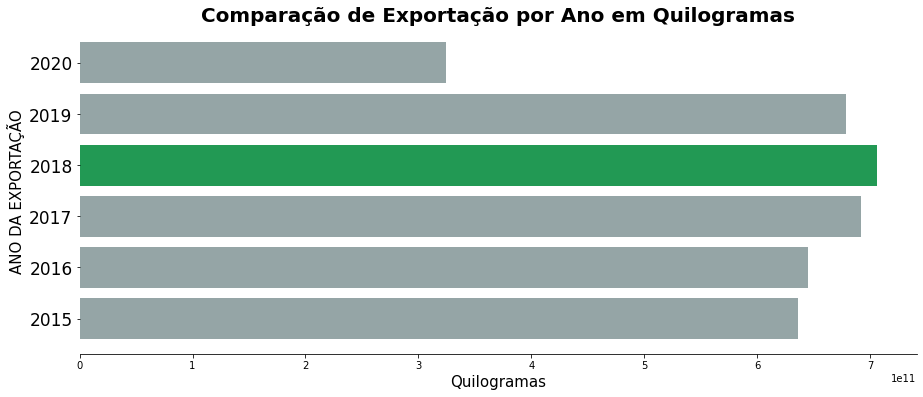

In [ ]:
#Ano que o Brasil mais Exportou
fig, ax = plt.subplots(figsize = (15,6))
plot = ax.barh(y = df.groupby('CO_ANO')['KG_LIQUIDO'].sum().index, 
               width = df.groupby('CO_ANO')['KG_LIQUIDO'].sum().values, 
               data = df.groupby('CO_ANO')['KG_LIQUIDO'].sum(), 
               color = ['#95A5A6' if (x < max(df.groupby('CO_ANO')['KG_LIQUIDO'].sum())) else '#229954' for x in df.groupby('CO_ANO')['KG_LIQUIDO'].sum()])
ax.set_ylabel('ANO DA EXPORTAÇÃO', fontsize = 15)
ax.set_xlabel('Quilogramas', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=17)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Comparação de Exportação por Ano em Quilogramas', fontsize = 20, fontweight="bold")

plt.show();

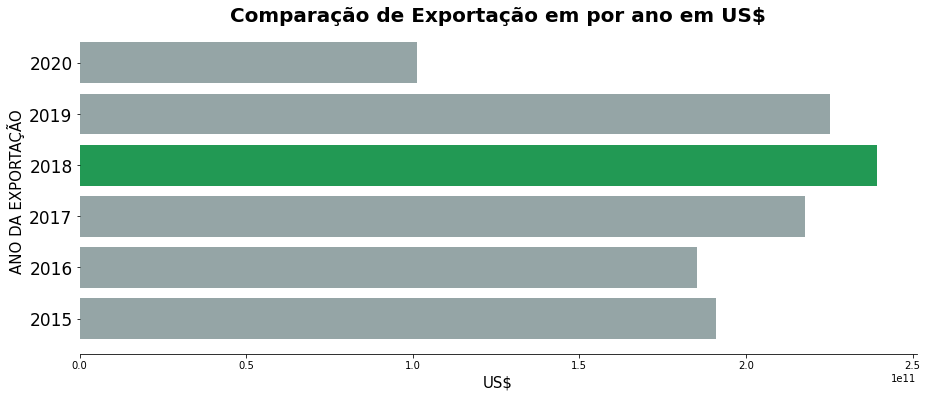

In [ ]:
#Ano que o Brasil mais Exportou
fig, ax = plt.subplots(figsize = (15,6))
plot = ax.barh(y = df.groupby('CO_ANO')['VL_FOB'].sum().index, 
               width = df.groupby('CO_ANO')['VL_FOB'].sum().values, 
               data = df.groupby('CO_ANO')['VL_FOB'].sum(), 
               color = ['#95A5A6' if (x < max(df.groupby('CO_ANO')['VL_FOB'].sum())) else '#229954' for x in df.groupby('CO_ANO')['VL_FOB'].sum()])
ax.set_ylabel('ANO DA EXPORTAÇÃO', fontsize = 15)
ax.set_xlabel('US$', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=17)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Comparação de Exportação em por ano em US$', fontsize = 20, fontweight="bold")

plt.show();

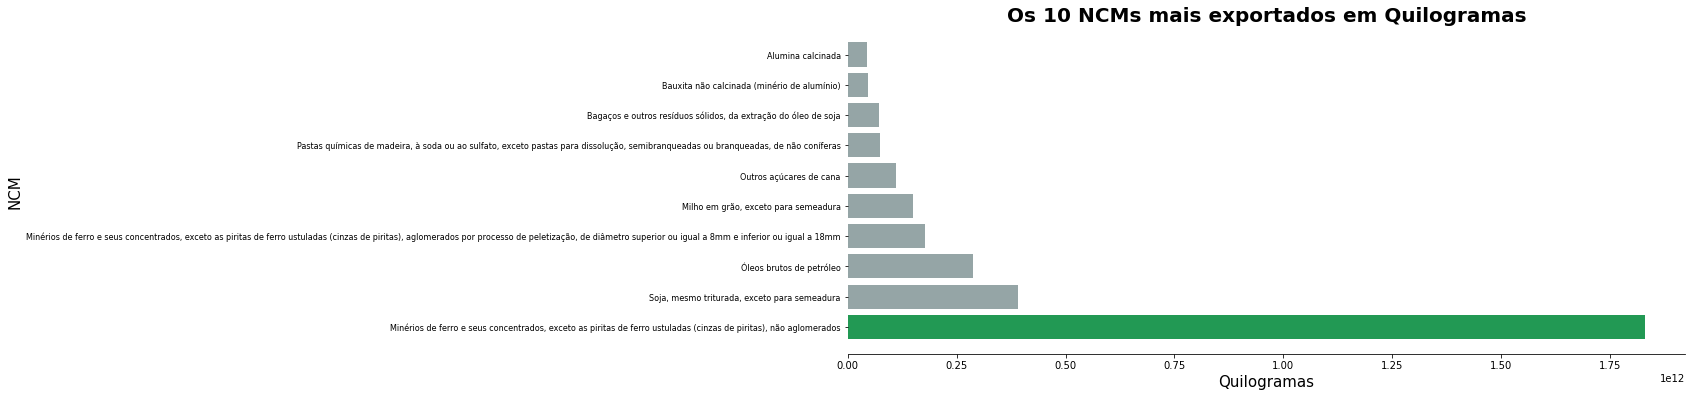

In [ ]:
#NCM Mais exportado em quilogramas (TOP 10)
fig, ax = plt.subplots(figsize = (15,6))
plot = ax.barh(y = df.groupby('NO_NCM_POR')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10).index, 
               width = df.groupby('NO_NCM_POR')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10).values, 
               data = df.groupby('NO_NCM_POR')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10), 
               color = ['#95A5A6' if (x < max(df.groupby('NO_NCM_POR')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10))) else '#229954' for x in df.groupby('NO_NCM_POR')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10)])
ax.set_ylabel('NCM', fontsize = 15)
ax.set_xlabel('Quilogramas', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=8)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Os 10 NCMs mais exportados em Quilogramas', fontsize = 20, fontweight="bold")

plt.show();

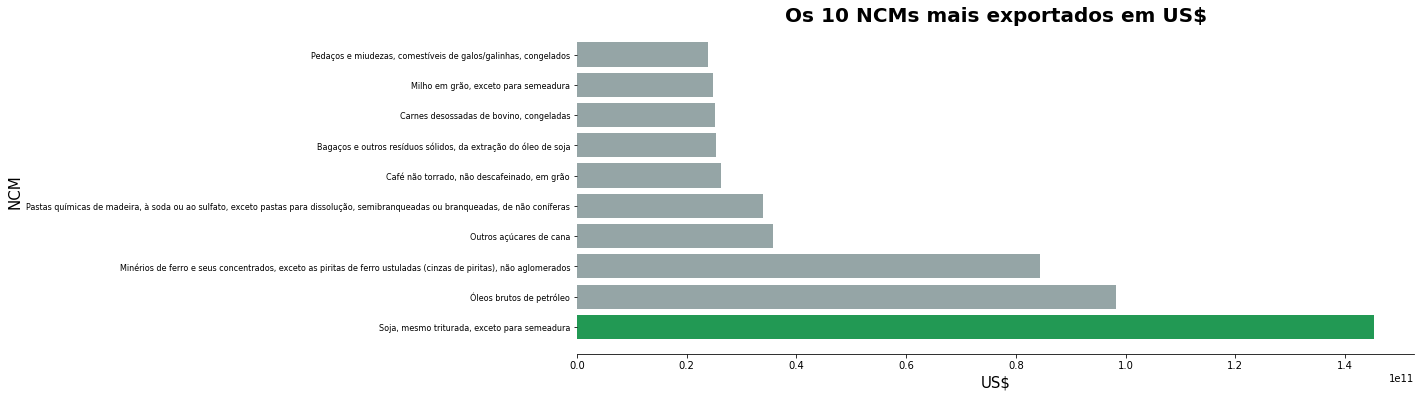

In [ ]:
#NCM Mais exportado em US$ (TOP 10)
fig, ax = plt.subplots(figsize = (15,6))
plot = ax.barh(y = df.groupby('NO_NCM_POR')['VL_FOB'].sum().sort_values(ascending = False).head(10).index, 
               width = df.groupby('NO_NCM_POR')['VL_FOB'].sum().sort_values(ascending = False).head(10).values, 
               data = df.groupby('NO_NCM_POR')['VL_FOB'].sum().sort_values(ascending = False).head(10), 
               color = ['#95A5A6' if (x < max(df.groupby('NO_NCM_POR')['VL_FOB'].sum().sort_values(ascending = False).head(10))) else '#229954' for x in df.groupby('NO_NCM_POR')['VL_FOB'].sum().sort_values(ascending = False).head(10)])
ax.set_ylabel('NCM', fontsize = 15)
ax.set_xlabel('US$', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=8)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Os 10 NCMs mais exportados em US$', fontsize = 20, fontweight="bold")

plt.show();

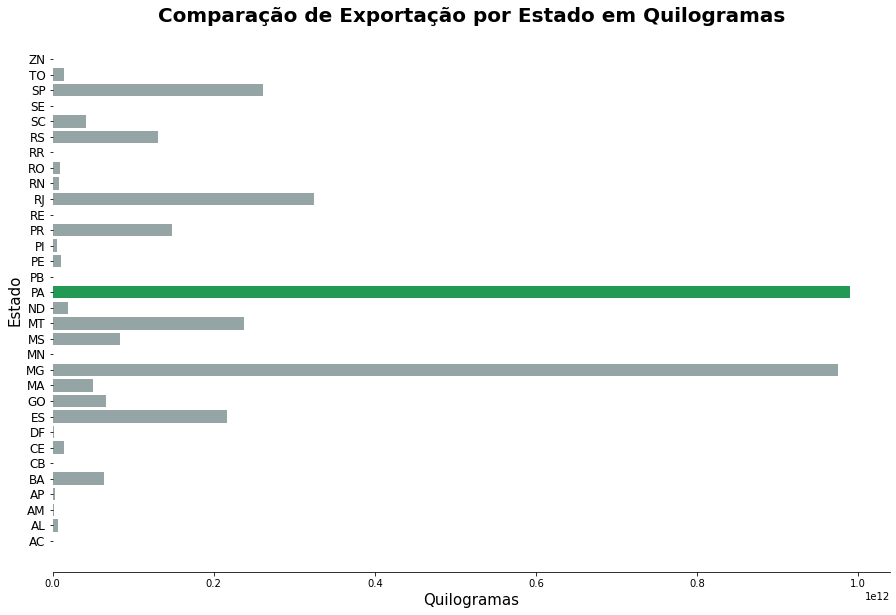

In [ ]:
#Comparação de Exportação por Estado em Quilogramas
fig, ax = plt.subplots(figsize = (15,10))
plot = ax.barh(y = df.groupby('SG_UF_NCM')['KG_LIQUIDO'].sum().index, 
               width = df.groupby('SG_UF_NCM')['KG_LIQUIDO'].sum().values, 
               data = df.groupby('SG_UF_NCM')['KG_LIQUIDO'].sum(), 
               color = ['#95A5A6' if (x < max(df.groupby('SG_UF_NCM')['KG_LIQUIDO'].sum())) else '#229954' for x in df.groupby('SG_UF_NCM')['KG_LIQUIDO'].sum()])
ax.set_ylabel('Estado', fontsize = 15)
ax.set_xlabel('Quilogramas', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Comparação de Exportação por Estado em Quilogramas', fontsize = 20, fontweight="bold")

plt.show();

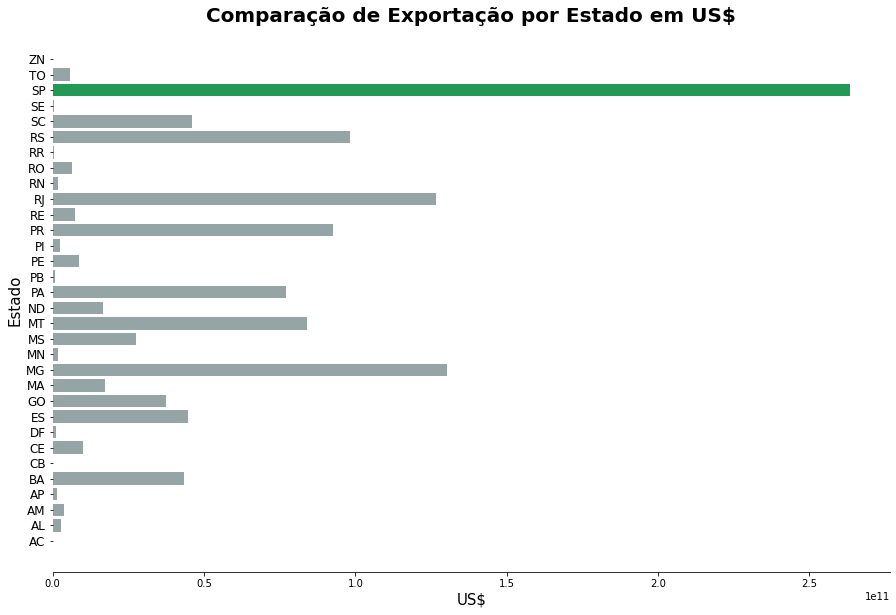

In [ ]:
#Comparação de Exportação por Estado em US$
fig, ax = plt.subplots(figsize = (15,10))
plot = ax.barh(y = df.groupby('SG_UF_NCM')['VL_FOB'].sum().index, 
               width = df.groupby('SG_UF_NCM')['VL_FOB'].sum().values, 
               data = df.groupby('SG_UF_NCM')['VL_FOB'].sum(), 
               color = ['#95A5A6' if (x < max(df.groupby('SG_UF_NCM')['VL_FOB'].sum())) else '#229954' for x in df.groupby('SG_UF_NCM')['VL_FOB'].sum()])
ax.set_ylabel('Estado', fontsize = 15)
ax.set_xlabel('US$', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Comparação de Exportação por Estado em US$', fontsize = 20, fontweight="bold")

plt.show();

Através dessa pequena Análise Exploratória, em um contexto macro dos nossos dados, já conseguimos entender e tirar alguns insights interessantes.

O ano que o Brasil mais exportou tanto em quilogramas quanto em doláres, foi em 2018.

O NCM mais exportado em quilogramas é o NCM relacionado aos minérios de ferros, enquanto em questão monetária, em doláres, o NCM com o qual o Brasil mais fatura é o NCM ligado a Soja.

O Estado que mais faturou com exportação foi o Estado de São Paulo, enquanto o que mais exportou em quilogramas foi o Estado do Pará.

Durante a análise exploratória percebemos também que há um estado aparentemente não determinado, que está com a sigla "ND", porém como o foco do nosso projeto é com relação ao Estado de São Paulo não iremos nos preocupar com ele.


Como o foco do Projeto está ligado ao Estado de São Paulo, vamos fazer uma análise exploratória filtrando apenas o Estado de São Paulo, assim conseguiremos mais alguns insights que ajudarão a entender melhor os nossos dados.

Vamos começar filtrando apenas o Estado de São Paulo.

In [ ]:
#Filtrando apenas o estado de São Paulo
sp = df[df['SG_UF_NCM'] == 'SP']

In [ ]:
#Conferindo se está tudo ok
sp.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,NO_NCM_POR,NO_PAIS
21,2017,8,74153300,10,607,SP,4,817600,0,0,1,"Parafusos; pinos ou pernos e porcas, de cobre",Portugal
36,2019,4,74153300,10,607,SP,4,817700,1,1,112,"Parafusos; pinos ou pernos e porcas, de cobre",Portugal
38,2019,4,74153300,10,607,SP,0,817800,3,3,313,"Parafusos; pinos ou pernos e porcas, de cobre",Portugal
44,2020,3,74153300,10,607,SP,1,927700,1,1,245,"Parafusos; pinos ou pernos e porcas, de cobre",Portugal
46,2015,3,19053200,10,607,SP,1,817800,22695,22695,44841,Waffles e wafers,Portugal


In [ ]:
#Conferindo se está tudo ok
sp.shape

(2659815, 13)

Para entender melhor os nossos dados, vamos formular algumas questões.

- Qual foi o ano que o Estado de São Paulo mais exportou (em Kg)?

- Qual foi o ano que o Estado de São Paulo mais exportou (em US$)?

- Qual foi o NCM do Estado de São Paulo mais exportado (Em Kg)?

- Com qual NCM o Estado de São Paulo mais faturou com exportações (em US$)?

- Quais são os clientes que mais importam de São Paulo (em Kg)?

- Quais são os clientes que mais importam de São Paulo (em US$)?


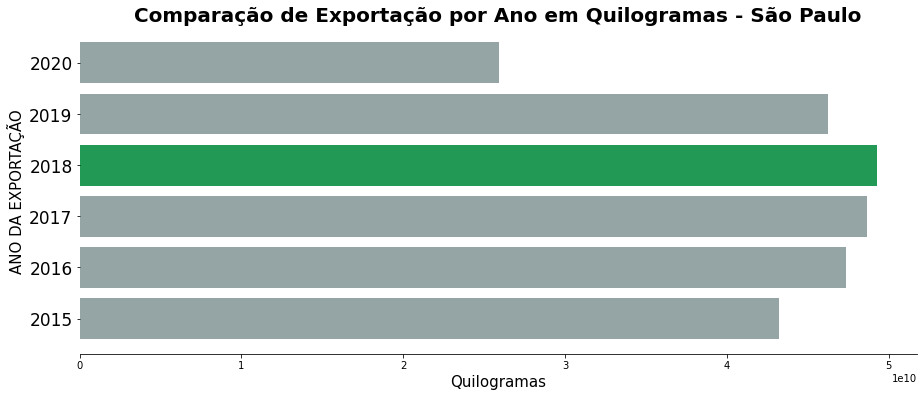

In [ ]:
#Ano que SP mais Exportou (KGs)
fig, ax = plt.subplots(figsize = (15,6))
plot = ax.barh(y = sp.groupby('CO_ANO')['KG_LIQUIDO'].sum().index, 
               width = sp.groupby('CO_ANO')['KG_LIQUIDO'].sum().values, 
               data = sp.groupby('CO_ANO')['KG_LIQUIDO'].sum(), 
               color = ['#95A5A6' if (x < max(sp.groupby('CO_ANO')['KG_LIQUIDO'].sum())) else '#229954' for x in sp.groupby('CO_ANO')['KG_LIQUIDO'].sum()])
ax.set_ylabel('ANO DA EXPORTAÇÃO', fontsize = 15)
ax.set_xlabel('Quilogramas', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=17)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Comparação de Exportação por Ano em Quilogramas - São Paulo', fontsize = 20, fontweight="bold")

plt.show();

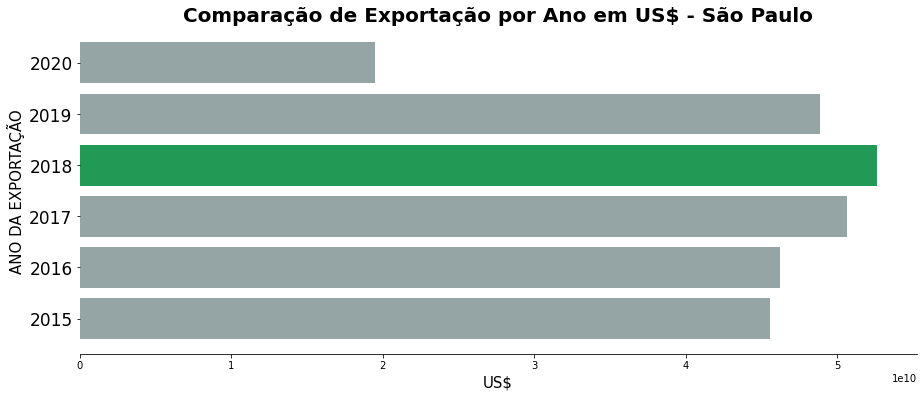

In [ ]:
#Ano que SP mais Exportou (US$)
fig, ax = plt.subplots(figsize = (15,6))
plot = ax.barh(y = sp.groupby('CO_ANO')['VL_FOB'].sum().index, 
               width = sp.groupby('CO_ANO')['VL_FOB'].sum().values, 
               data = sp.groupby('CO_ANO')['VL_FOB'].sum(), 
               color = ['#95A5A6' if (x < max(sp.groupby('CO_ANO')['VL_FOB'].sum())) else '#229954' for x in sp.groupby('CO_ANO')['VL_FOB'].sum()])
ax.set_ylabel('ANO DA EXPORTAÇÃO', fontsize = 15)
ax.set_xlabel('US$', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=17)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Comparação de Exportação por Ano em US$ - São Paulo', fontsize = 20, fontweight="bold")

plt.show();

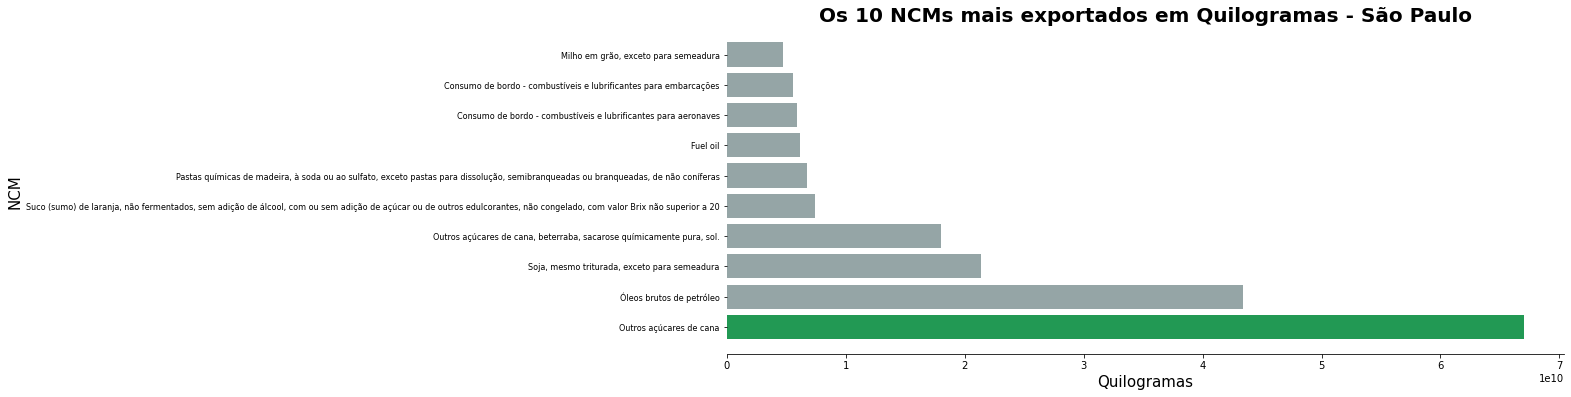

In [ ]:
#NCM Mais exportado em KGs (TOP 10)
fig, ax = plt.subplots(figsize = (15,6))
plot = ax.barh(y = sp.groupby('NO_NCM_POR')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10).index, 
               width = sp.groupby('NO_NCM_POR')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10).values, 
               data = sp.groupby('NO_NCM_POR')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10), 
               color = ['#95A5A6' if (x < max(sp.groupby('NO_NCM_POR')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10))) else '#229954' for x in sp.groupby('NO_NCM_POR')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10)])
ax.set_ylabel('NCM', fontsize = 15)
ax.set_xlabel('Quilogramas', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=8)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Os 10 NCMs mais exportados em Quilogramas - São Paulo', fontsize = 20, fontweight="bold")

plt.show();

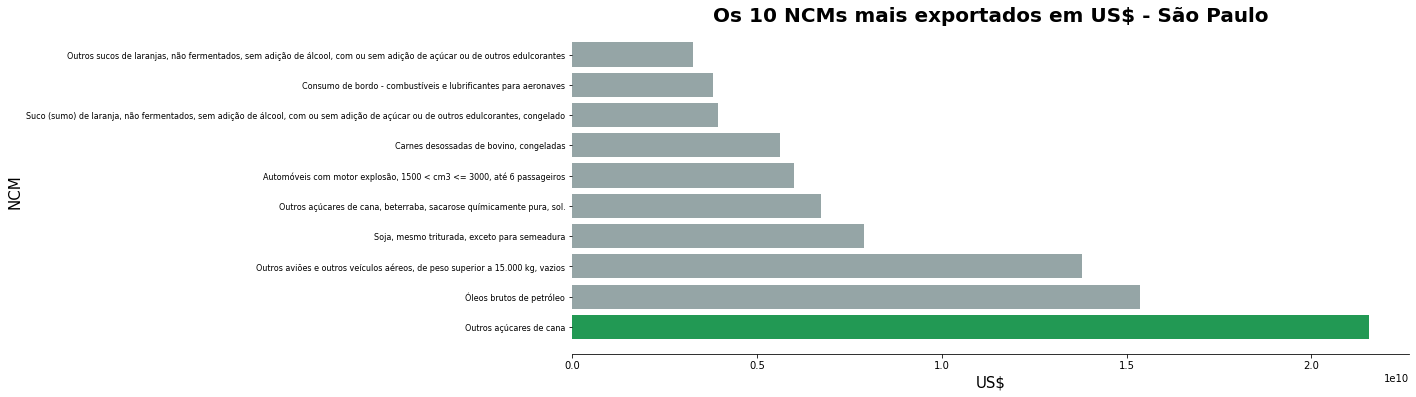

In [ ]:
#NCM Mais exportado em US$ (TOP 10)
fig, ax = plt.subplots(figsize = (15,6))
plot = ax.barh(y = sp.groupby('NO_NCM_POR')['VL_FOB'].sum().sort_values(ascending = False).head(10).index, 
               width = sp.groupby('NO_NCM_POR')['VL_FOB'].sum().sort_values(ascending = False).head(10).values, 
               data = sp.groupby('NO_NCM_POR')['VL_FOB'].sum().sort_values(ascending = False).head(10), 
               color = ['#95A5A6' if (x < max(sp.groupby('NO_NCM_POR')['VL_FOB'].sum().sort_values(ascending = False).head(10))) else '#229954' for x in sp.groupby('NO_NCM_POR')['VL_FOB'].sum().sort_values(ascending = False).head(10)])
ax.set_ylabel('NCM', fontsize = 15)
ax.set_xlabel('US$', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=8)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Os 10 NCMs mais exportados em US$ - São Paulo', fontsize = 20, fontweight="bold")

plt.show();

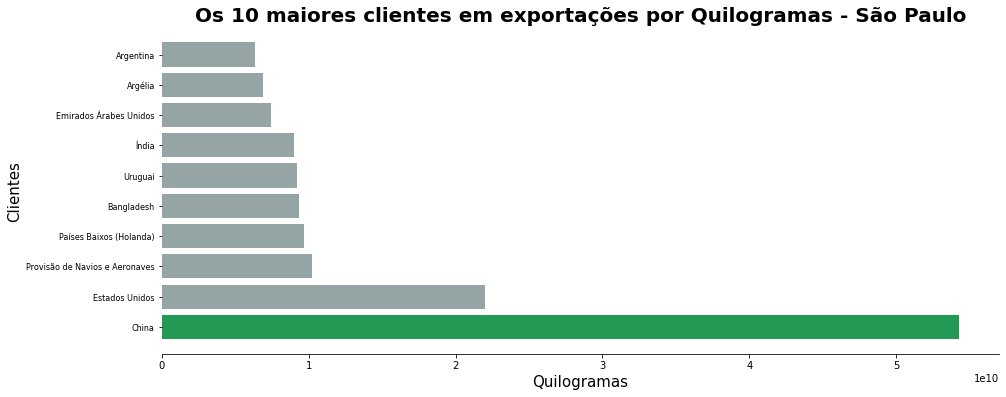

In [ ]:
#Maiores clientes (TOP 10) KGs
fig, ax = plt.subplots(figsize = (15,6))
plot = ax.barh(y = sp.groupby('NO_PAIS')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10).index, 
               width = sp.groupby('NO_PAIS')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10).values, 
               data = sp.groupby('NO_PAIS')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10), 
               color = ['#95A5A6' if (x < max(sp.groupby('NO_PAIS')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10))) else '#229954' for x in sp.groupby('NO_PAIS')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10)])
ax.set_ylabel('Clientes', fontsize = 15)
ax.set_xlabel('Quilogramas', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=8)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Os 10 maiores clientes em exportações por Quilogramas - São Paulo', fontsize = 20, fontweight="bold")

plt.show();

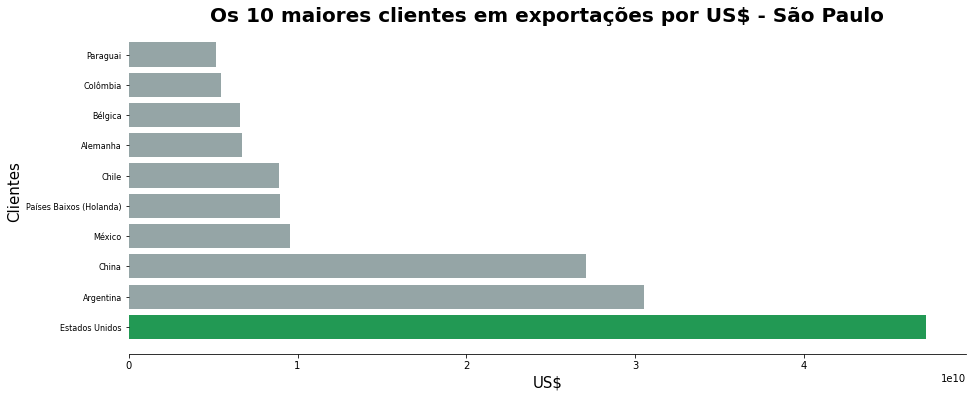

In [ ]:
#Maiores clientes (TOP 10) US$
fig, ax = plt.subplots(figsize = (15,6))
plot = ax.barh(y = sp.groupby('NO_PAIS')['VL_FOB'].sum().sort_values(ascending = False).head(10).index, 
               width = sp.groupby('NO_PAIS')['VL_FOB'].sum().sort_values(ascending = False).head(10).values, 
               data = sp.groupby('NO_PAIS')['VL_FOB'].sum().sort_values(ascending = False).head(10), 
               color = ['#95A5A6' if (x < max(sp.groupby('NO_PAIS')['VL_FOB'].sum().sort_values(ascending = False).head(10))) else '#229954' for x in sp.groupby('NO_PAIS')['VL_FOB'].sum().sort_values(ascending = False).head(10)])
ax.set_ylabel('Clientes', fontsize = 15)
ax.set_xlabel('US$', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=8)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Os 10 maiores clientes em exportações por US$ - São Paulo', fontsize = 20, fontweight="bold")

plt.show();

Aqui podemos retirar mais alguns insights com relação ao Estado de São Paulo.

São Paulo seguiu a mesma tendência nacional e teve o seu pico de exportação em 2018, tanto em quilogramas quanto em doláres.

O NCM mais exportado tanto em quilogramas quanto em doláres é o NCM relacionado à "Outros açúcares de cana", que é o NCM que utilizaremos em nosso projeto para fazer a previsão de exportação.

Já o cliente com o qual o Estado mais fatura é o Estados Unidos, seguido por um vizinho nosso, a Argentina. Enquanto em questão de quilogramas, temos a China como o principal cliente de longe.


Para encerrarmos nossa análise exploratória, vamos dar mais uma afunilada e dar uma olhada em nosso NCM escolhido para o Projeto, o NCM "17011400", que é o relacionado à "Outros açúcares de cana", como foi supracitado, e como ele se comporta no Estado de São Paulo.

Novamente, para entender melhor os nossos dados, vamos formular algumas questões.

- Qual foi o ano que o Estado de São Paulo mais exportou o NCM 17011400 (em Kg)?

- Qual foi o ano que o Estado de São Paulo mais exportou o NCM 17011400  (em US$)?

- Quais são os clientes que mais importam o NCM 17011400 do Estado de Sâo Paulo (em Kg)?

- Quais são os clientes que mais importam o NCM 17011400 do Estado de Sâo Paulo  (em US$)?

- Qual o mês que tem a maior média de exportação do NCM 17011400 no Estado de Sâo Paulo (em Kg)?

- Qual o mês que tem a maior média de exportação do NCM 17011400 no Estado de Sâo Paulo  (em US$)?

In [ ]:
#Começar separando o NCM 17011400 do restante dos dados do estado de São Paulo
sp_acucar = sp[sp['CO_NCM'] == 17011400]

In [ ]:
#Verificando se está tudo ok
sp_acucar.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,NO_NCM_POR,NO_PAIS
3036,2015,2,17011400,21,607,SP,1,817800,26,26000,14300,Outros açúcares de cana,Portugal
3037,2015,7,17011400,21,607,SP,1,817800,52,52000,22360,Outros açúcares de cana,Portugal
3040,2016,10,17011400,21,607,SP,1,817800,0,240,288,Outros açúcares de cana,Portugal
3046,2017,9,17011400,21,607,SP,1,917800,18308,18308000,6031372,Outros açúcares de cana,Portugal
3047,2017,10,17011400,21,607,SP,1,917800,912,912000,228000,Outros açúcares de cana,Portugal


In [ ]:
#Verificando se está tudo ok
sp_acucar.shape

(2383, 13)

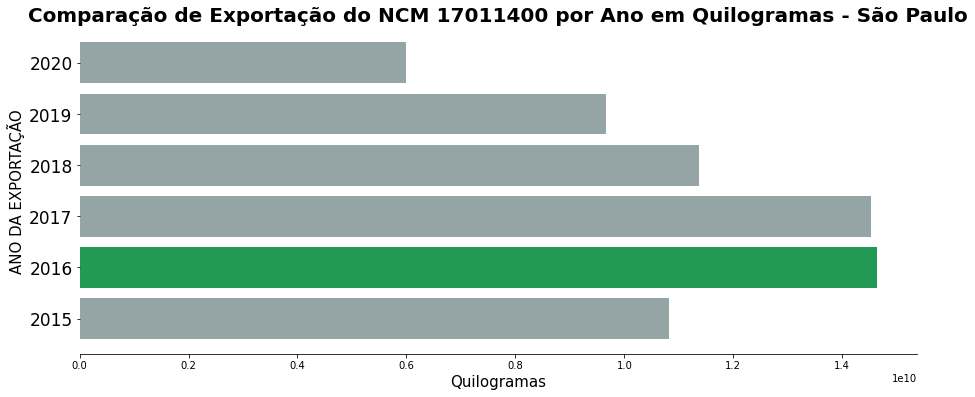

In [ ]:
#Ano que SP mais Exportou o NCM 17011400 (KGs)
fig, ax = plt.subplots(figsize = (15,6))
plot = ax.barh(y = sp_acucar.groupby('CO_ANO')['KG_LIQUIDO'].sum().index, 
               width = sp_acucar.groupby('CO_ANO')['KG_LIQUIDO'].sum().values, 
               data = sp_acucar.groupby('CO_ANO')['KG_LIQUIDO'].sum(), 
               color = ['#95A5A6' if (x < max(sp_acucar.groupby('CO_ANO')['KG_LIQUIDO'].sum())) else '#229954' for x in sp_acucar.groupby('CO_ANO')['KG_LIQUIDO'].sum()])
ax.set_ylabel('ANO DA EXPORTAÇÃO', fontsize = 15)
ax.set_xlabel('Quilogramas', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=17)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Comparação de Exportação do NCM 17011400 por Ano em Quilogramas - São Paulo', fontsize = 20, fontweight="bold")

plt.show();

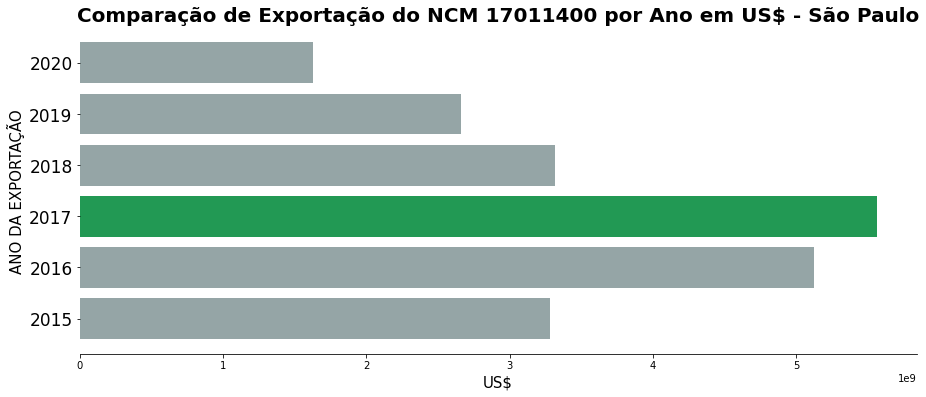

In [ ]:
#Ano que SP mais Exportou o NCM 17011400 (US$)
fig, ax = plt.subplots(figsize = (15,6))
plot = ax.barh(y = sp_acucar.groupby('CO_ANO')['VL_FOB'].sum().index, 
               width = sp_acucar.groupby('CO_ANO')['VL_FOB'].sum().values, 
               data = sp_acucar.groupby('CO_ANO')['VL_FOB'].sum(), 
               color = ['#95A5A6' if (x < max(sp_acucar.groupby('CO_ANO')['VL_FOB'].sum())) else '#229954' for x in sp_acucar.groupby('CO_ANO')['VL_FOB'].sum()])
ax.set_ylabel('ANO DA EXPORTAÇÃO', fontsize = 15)
ax.set_xlabel('US$', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=17)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Comparação de Exportação do NCM 17011400 por Ano em US$ - São Paulo', fontsize = 20, fontweight="bold")

plt.show();

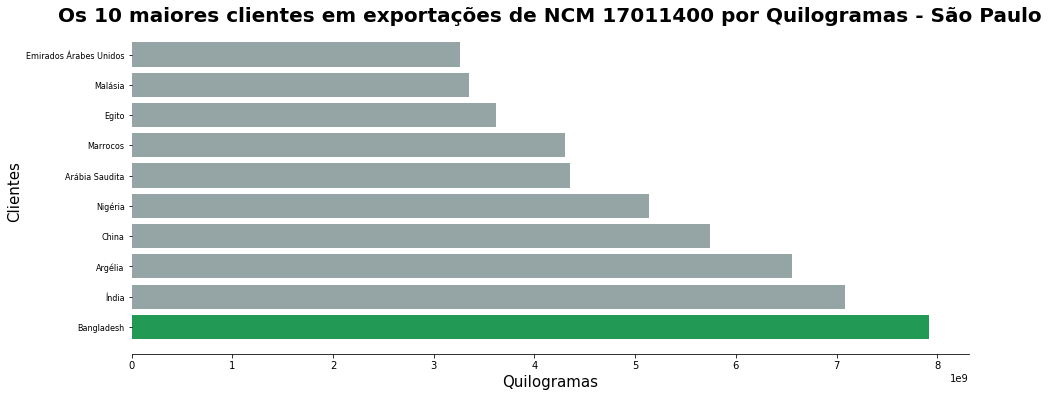

In [ ]:
#Maiores clientes do NCM 17011400 (TOP 10) KGs
fig, ax = plt.subplots(figsize = (15,6))
plot = ax.barh(y = sp_acucar.groupby('NO_PAIS')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10).index, 
               width = sp_acucar.groupby('NO_PAIS')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10).values, 
               data = sp_acucar.groupby('NO_PAIS')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10), 
               color = ['#95A5A6' if (x < max(sp_acucar.groupby('NO_PAIS')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10))) else '#229954' for x in sp_acucar.groupby('NO_PAIS')['KG_LIQUIDO'].sum().sort_values(ascending = False).head(10)])
ax.set_ylabel('Clientes', fontsize = 15)
ax.set_xlabel('Quilogramas', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=8)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Os 10 maiores clientes em exportações de NCM 17011400 por Quilogramas - São Paulo', fontsize = 20, fontweight="bold")

plt.show();

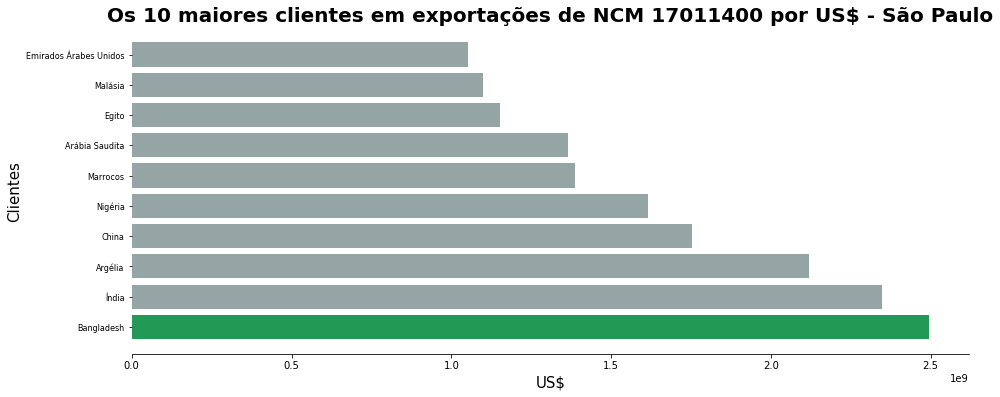

In [ ]:
#Maiores clientes do NCM 17011400 (TOP 10) US$
fig, ax = plt.subplots(figsize = (15,6))
plot = ax.barh(y = sp_acucar.groupby('NO_PAIS')['VL_FOB'].sum().sort_values(ascending = False).head(10).index, 
               width = sp_acucar.groupby('NO_PAIS')['VL_FOB'].sum().sort_values(ascending = False).head(10).values, 
               data = sp_acucar.groupby('NO_PAIS')['VL_FOB'].sum().sort_values(ascending = False).head(10), 
               color = ['#95A5A6' if (x < max(sp_acucar.groupby('NO_PAIS')['VL_FOB'].sum().sort_values(ascending = False).head(10))) else '#229954' for x in sp_acucar.groupby('NO_PAIS')['VL_FOB'].sum().sort_values(ascending = False).head(10)])
ax.set_ylabel('Clientes', fontsize = 15)
ax.set_xlabel('US$', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=8)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Os 10 maiores clientes em exportações de NCM 17011400 por US$ - São Paulo', fontsize = 20, fontweight="bold")

plt.show();

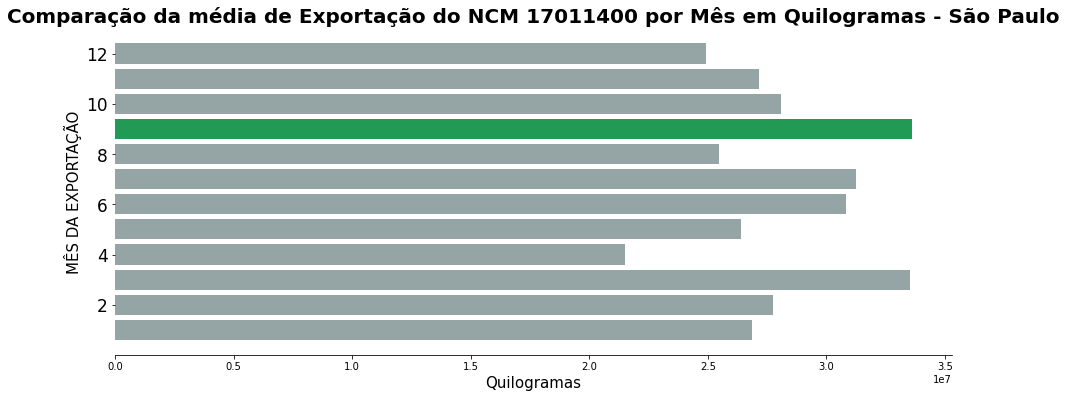

In [ ]:
#Mês que possui a maior média de exportação do NCM 17011400 do Estado de São Paulo
#Agora usaremos o "mean" não mais o "sum", pois estamos falando de média.
fig, ax = plt.subplots(figsize = (15,6))
plot = ax.barh(y = sp_acucar.groupby('CO_MES')['KG_LIQUIDO'].mean().index, 
               width = sp_acucar.groupby('CO_MES')['KG_LIQUIDO'].mean().values, 
               data = sp_acucar.groupby('CO_MES')['KG_LIQUIDO'].mean(), 
               color = ['#95A5A6' if (x < max(sp_acucar.groupby('CO_MES')['KG_LIQUIDO'].mean())) else '#229954' for x in sp_acucar.groupby('CO_MES')['KG_LIQUIDO'].mean()])
ax.set_ylabel('MÊS DA EXPORTAÇÃO', fontsize = 15)
ax.set_xlabel('Quilogramas', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=17)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Comparação da média de Exportação do NCM 17011400 por Mês em Quilogramas - São Paulo', fontsize = 20, fontweight="bold")

plt.show();

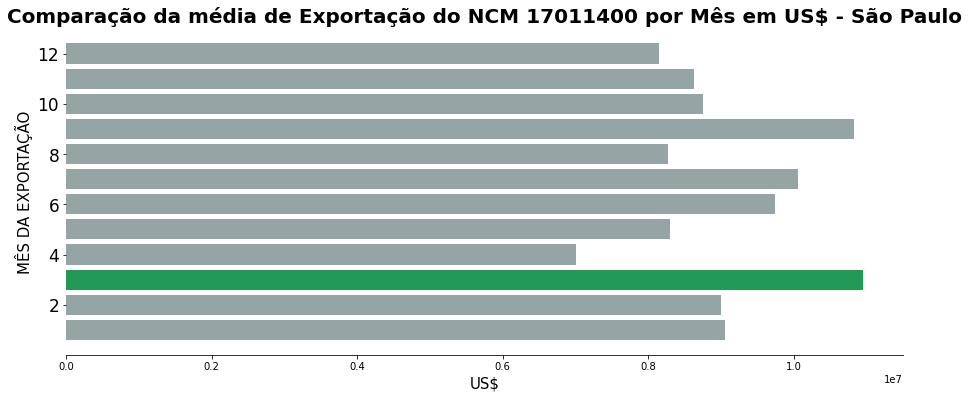

In [ ]:
#Mês que possui a maior média de exportação do NCM 17011400 do Estado de São Paulo
#Agora usaremos o "mean" não mais o "sum", pois estamos falando de média.
fig, ax = plt.subplots(figsize = (15,6))
plot = ax.barh(y = sp_acucar.groupby('CO_MES')['VL_FOB'].mean().index, 
               width = sp_acucar.groupby('CO_MES')['VL_FOB'].mean().values, 
               data = sp_acucar.groupby('CO_MES')['VL_FOB'].mean(), 
               color = ['#95A5A6' if (x < max(sp_acucar.groupby('CO_MES')['VL_FOB'].mean())) else '#229954' for x in sp_acucar.groupby('CO_MES')['VL_FOB'].mean()])
ax.set_ylabel('MÊS DA EXPORTAÇÃO', fontsize = 15)
ax.set_xlabel('US$', fontsize = 15)
ax.tick_params(axis='y', which='major', labelsize=17)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Comparação da média de Exportação do NCM 17011400 por Mês em US$ - São Paulo', fontsize = 20, fontweight="bold")

plt.show();

Analisando o NCM 17011400 no Estado de Sâo Paulo, retiramos mais alguns insights.

Ao contrário do que observamos quando analisamos o Brasil e o Estado de São Paulo em um contexto macro, com todos os produtos, quando analisamos apenas o NCM 17011400 no Estado de São Paulo vemos que o pico de faturamento se deu no ano de 2017, e o pico em exportação por quilogramas se deu em 2016, seguido de perto pelo ano de 2017. Podemos observar que houve um aumento de preço do produto do ano de 2016 para 2017, pois mesmo com menos exportações em quilogramas conseguiu um maior faturamento.

Conseguimos observar que o maior cliente deste produto é o "Bangladesh", seguido por India e Argélia.

Os meses com maiores médias de exportações são os meses de Março e Setembro, possuindo médias muito próximas, tanto em quilogramas quanto em doláres.



Já conseguimos retirar bastante informações dos dados, e agora vamos para a parte mais divertida do nosso projeto. A modelagem da série temporal.

##**Quarto Passo**

Neste passo iremos começar nossa modelagem de Série Temporal. 

Iremos utilizar 3 modelos diferentes e analisar qual possui o menor *RMSE*(Erro Quadrático Médio), o que obtiver o menor erro será o modelo utilizado para nosso forecast final.

Os modelos utilizados serão:

- ARIMA

- SARIMA

- Prophet

Para o forecast iremos utilizar a média em quilogramas do NCM 17011400 como variável de nosso modelo.

Vamos começar preparando nossos dados para a modelagem da série temporal. Temos que começar fazendo a junção do Ano com o Mês de nosso DataFrame, após isso transforma-los no tipo ***datetime*** do ***Pandas*** e colocar como nosso index.


In [ ]:
#verificando os dados
sp_acucar.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,NO_NCM_POR,NO_PAIS
3036,2015,2,17011400,21,607,SP,1,817800,26,26000,14300,Outros açúcares de cana,Portugal
3037,2015,7,17011400,21,607,SP,1,817800,52,52000,22360,Outros açúcares de cana,Portugal
3040,2016,10,17011400,21,607,SP,1,817800,0,240,288,Outros açúcares de cana,Portugal
3046,2017,9,17011400,21,607,SP,1,917800,18308,18308000,6031372,Outros açúcares de cana,Portugal
3047,2017,10,17011400,21,607,SP,1,917800,912,912000,228000,Outros açúcares de cana,Portugal


In [ ]:
#Trocando os nomes para facilitar nosso trabalho de modelagem
sp_acucar.rename(columns = {'CO_ANO': 'Year', 'CO_MES': 'Month'}, inplace = True)

In [ ]:
#Junção de mês e ano e transformação em datetime
sp_acucar['Date'] = pd.to_datetime(sp_acucar[['Year', 'Month']].assign(Day=1))

In [ ]:
#Verificando os dados
sp_acucar.head()

,Year,Month,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,NO_NCM_POR,NO_PAIS,Date
3036,2015,2,17011400,21,607,SP,1,817800,26,26000,14300,Outros açúcares de cana,Portugal,2015-02-01
3037,2015,7,17011400,21,607,SP,1,817800,52,52000,22360,Outros açúcares de cana,Portugal,2015-07-01
3040,2016,10,17011400,21,607,SP,1,817800,0,240,288,Outros açúcares de cana,Portugal,2016-10-01
3046,2017,9,17011400,21,607,SP,1,917800,18308,18308000,6031372,Outros açúcares de cana,Portugal,2017-09-01
3047,2017,10,17011400,21,607,SP,1,917800,912,912000,228000,Outros açúcares de cana,Portugal,2017-10-01


In [ ]:
#separando os dados para a modelagem caso erre algum código
sp_acucar_orig = sp_acucar.copy()

In [ ]:
#começar separando apenas as informações necessárias
sp_acucar = sp_acucar[['Date','KG_LIQUIDO']]

In [ ]:
#verificando os dados
sp_acucar.head()

,Date,KG_LIQUIDO
3036,2015-02-01,26000
3037,2015-07-01,52000
3040,2016-10-01,240
3046,2017-09-01,18308000
3047,2017-10-01,912000


In [ ]:
#colocando o datetime como index
sp_acucar.set_index('Date', inplace= True)

In [ ]:
#verificando os dados
sp_acucar.head()

,KG_LIQUIDO
Date,
2015-02-01,26000
2015-07-01,52000
2016-10-01,240
2017-09-01,18308000
2017-10-01,912000


In [ ]:
#verificando o tipo
type(sp_acucar.index)

pandas.core.indexes.datetimes.DatetimeIndex

Primeira parte da nossa modelagem completa, separamos apenas as informações necessárias.

Vamos para outra análise exploratória, porém agora ligada à série temporal.

In [ ]:
#Usando o valor médio mensal
media_sp_acucar = sp_acucar['KG_LIQUIDO'].resample('MS').mean()

In [ ]:
#Verificando o tipo
type(media_sp_acucar)

pandas.core.series.Series

In [ ]:
#Verificando quantos meses possuem no dado
print("O DataFrame possui {} meses".format(len(media_sp_acucar)))

O DataFrame possui 66 meses


In [ ]:
#verificando o DataFrame
media_sp_acucar.head(10)

Date
2015-01-01    3.434086e+07
2015-02-01    2.317782e+07
2015-03-01    4.714379e+07
2015-04-01    1.114659e+07
2015-05-01    2.379303e+07
2015-06-01    2.769405e+07
2015-07-01    3.039402e+07
2015-08-01    3.566163e+07
2015-09-01    1.772237e+07
2015-10-01    3.151894e+07
Freq: MS, Name: KG_LIQUIDO, dtype: float64

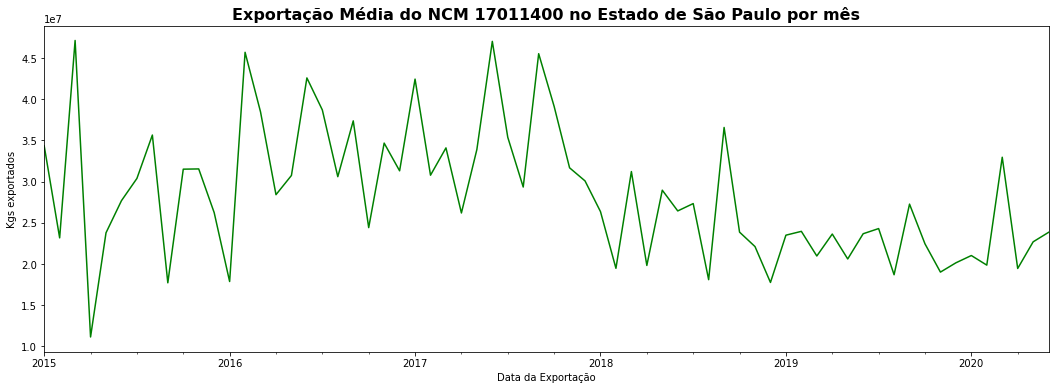

In [ ]:
#Plot
media_sp_acucar.plot(color = 'green', figsize = (18,6))
plt.xlabel('Data da Exportação')
plt.ylabel('Kgs exportados')
plt.title('Exportação Média do NCM 17011400 no Estado de São Paulo por mês', fontsize = 16, fontweight = 'bold')
plt.show();

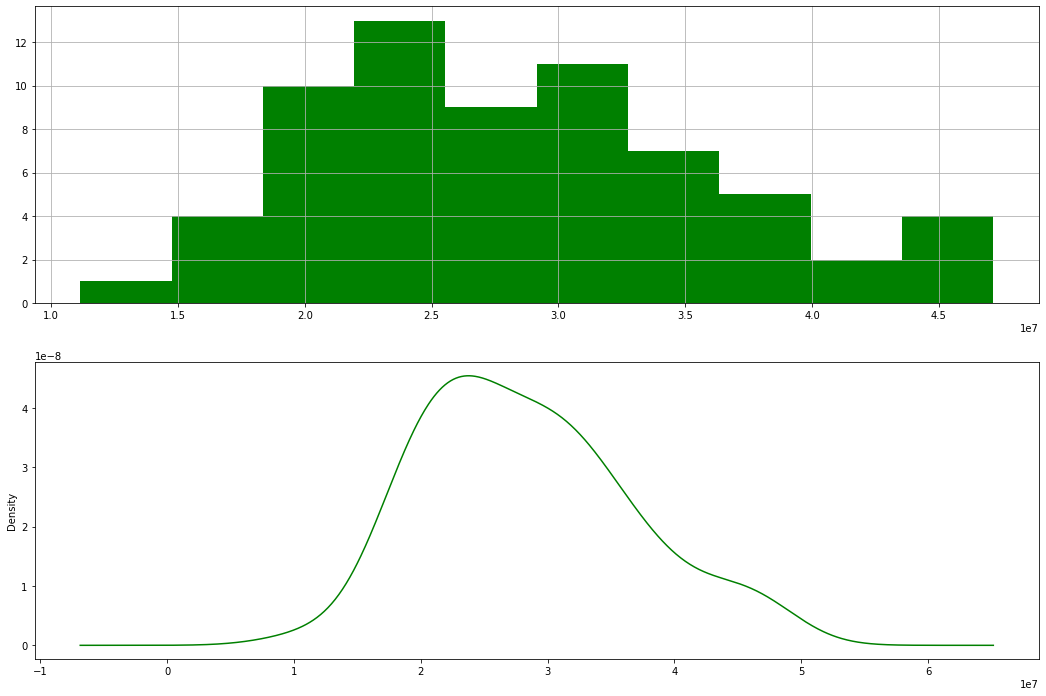

In [ ]:
#Gráfico de Densidade
matplotlib.rcParams['figure.figsize'] = 18, 12

plt.figure(1)

plt.subplot(211)
media_sp_acucar.hist(color = 'green')

plt.subplot(212)
media_sp_acucar.plot(kind = 'kde', color = 'green')
plt.show();

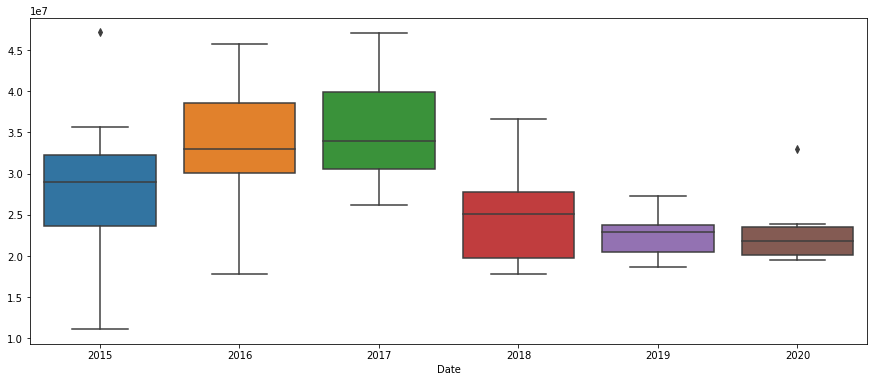

In [ ]:
#Boxplot 
fig, ax = plt.subplots(figsize = (15,6))

sns.boxplot(media_sp_acucar.index.year, media_sp_acucar.values, ax = ax)

Analisando os gráficos acima podemos ver que a tendência dele está caindo com o passar do tempo. Aparentemente há alguma sazonalidade também, porém pode ser um efeito considerado cíclico, será necessário uma decomposição dessa série temporal para entende-la melhor, para isso usaremos a biblioteca ***Statsmodels*** que já importamos no início de nosso projeto.

Além disso vemos que a média dele não é perfeitamente gaussiana, porém muito perto dela

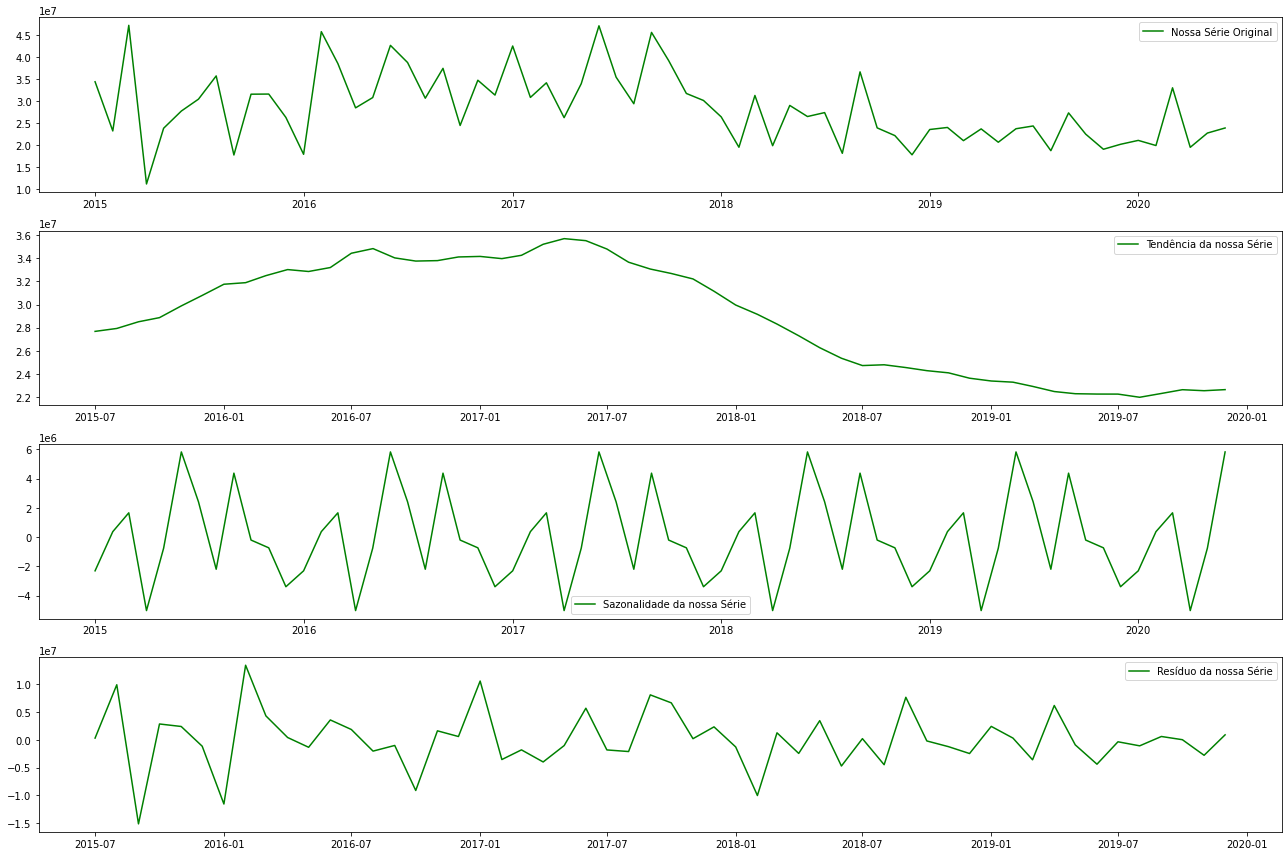

In [ ]:
#Vamos decompor nossa série temporal

decomposicao = seasonal_decompose(media_sp_acucar, freq= 12)
matplotlib.rcParams['figure.figsize'] = 18, 12

tendencia = decomposicao.trend
sazonalidade = decomposicao.seasonal
residuo = decomposicao.resid

plt.subplot(411)
plt.plot(media_sp_acucar, label = 'Nossa Série Original', color = 'g')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(tendencia, label = 'Tendência da nossa Série', color = 'g')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(sazonalidade, label = "Sazonalidade da nossa Série", color = 'g')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residuo, label = 'Resíduo da nossa Série', color = 'g')
plt.legend(loc = 'best')
plt.tight_layout()



A partir da decomposição da série temporal podemos retirar alguns insights:

1. A primeira linha mostra a nossa série original, sem nenhuma alteração;
2. A segunda linha mostra a tendência da nossa série temporal, vemos que ela está caindo com o decorrer do tempo, conforme já tinhamos observado nos gráficos anteriores, porém conseguimos confirmar com a decomposição;
3. A terceira linha nos mostra a sazonalidade, conseguimos observar que há alguns picos de aumento que acontecem após um grande pico de queda..
4. A quarta linha nos mostra o resíduo, que são os componentes irregulares da nossa série temporal, que não conseguem ser explicadas.

Quando estamos trabalhando com séries temporais, a maioria dos modelos trabalham com o pressuposto de que estamos apresentando uma série temporal estacionária.

Então faremos o teste *ADF - "Augmented Dickey-Fuller"*. Neste teste, a hipótese nula é de que a série temporal não é estacionária, o **Statsmodels** facilita o cálculo do teste.

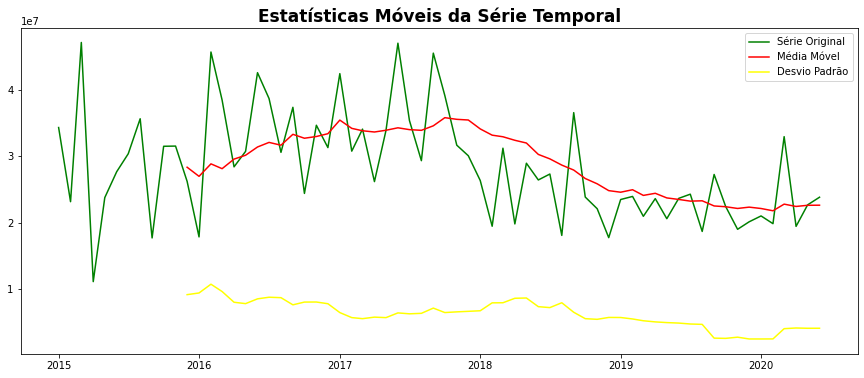

In [ ]:
#Plot de Estatísticas Móveis
fig, ax = plt.subplots(figsize = (15,6))

rollingmean = media_sp_acucar.rolling(window = 12).mean()
rollingstd = media_sp_acucar.rolling(window = 12).std()

original = plt.plot(media_sp_acucar, color = 'green', label = 'Série Original')
media_movel = plt.plot(rollingmean, color = 'red', label = 'Média Móvel')
desvio_padrao = plt.plot(rollingstd, color = 'yellow', label = 'Desvio Padrão')
plt.legend(loc = 'best')
plt.title('Estatísticas Móveis da Série Temporal', fontsize = 17, fontweight = 'bold')
plt.show();


In [ ]:
#Teste ADF

print('\n RESULTADO DO TESTE ADF:\n')

teste = adfuller(media_sp_acucar, autolag = 'AIC')
saida = pd.Series(teste[0:4], index = ['Estatística do Teste ADF', 'p-value', 'Número de Lags Considerado pelo teste', 'Número de Observações Utilizadas'])

for k,v in teste[4].items():
  saida['Valor Crítico (%s)'%k] = v

print(saida)


 RESULTADO DO TESTE ADF:

Estatística do Teste ADF                 -1.536324
p-value                                   0.515472
Número de Lags Considerado pelo teste     3.000000
Número de Observações Utilizadas         62.000000
Valor Crítico (1%)                       -3.540523
Valor Crítico (5%)                       -2.909427
Valor Crítico (10%)                      -2.592314
dtype: float64


Quando fizemos o plot do gráfico de estatísticas móveis já poderíamos ter uma idéia de que é uma série não estacionária. Sua média móvel caiu com o tempo e não se manteve constante. E o teste *ADF* só veio para confirmar que ela realmente não é estácionaria, possui um p-value maior que 0.05, sendo assim não temos evidência parar rejeitar a hipótese nula.

Devemos fazer algumas transformações nessa série antes de começar a trabalhar com ela.

Vamos começar com uma transformação de log em nossa série e verificar como ela reage a essa transformação.

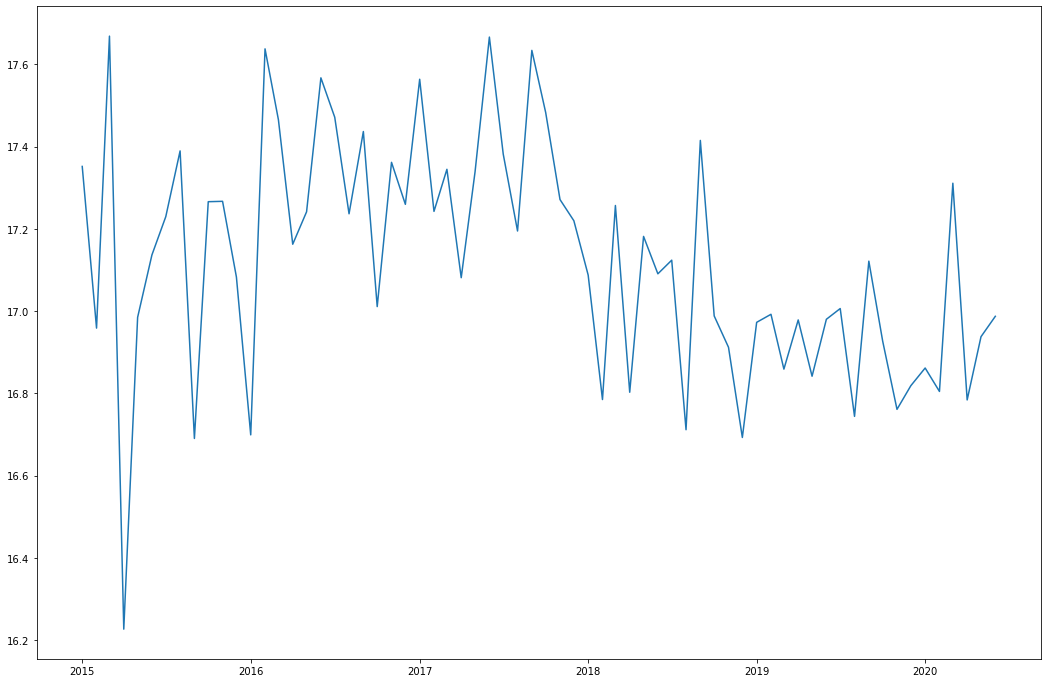

In [ ]:
#Transformação e plot da transformação de log de nossa série
media_sp_acucar_log = np.log(media_sp_acucar)
plt.plot(media_sp_acucar_log)

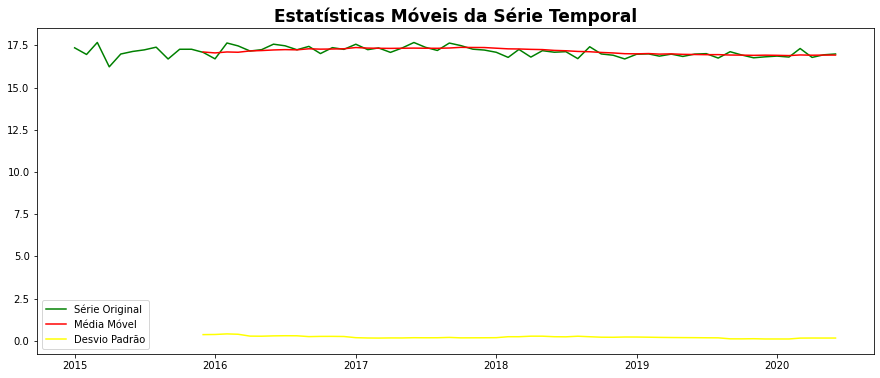


 RESULTADO DO TESTE ADF:

Estatística do Teste ADF                 -1.668370
p-value                                   0.447478
Número de Lags Considerado pelo teste     3.000000
Número de Observações Utilizadas         62.000000
Valor Crítico (1%)                       -3.540523
Valor Crítico (5%)                       -2.909427
Valor Crítico (10%)                      -2.592314
dtype: float64


In [ ]:
#Plot de Estatísticas Móveis
fig, ax = plt.subplots(figsize = (15,6))

rollingmean = media_sp_acucar_log.rolling(window = 12).mean()
rollingstd = media_sp_acucar_log.rolling(window = 12).std()

original = plt.plot(media_sp_acucar_log, color = 'green', label = 'Série Original')
media_movel = plt.plot(rollingmean, color = 'red', label = 'Média Móvel')
desvio_padrao = plt.plot(rollingstd, color = 'yellow', label = 'Desvio Padrão')
plt.legend(loc = 'best')
plt.title('Estatísticas Móveis da Série Temporal', fontsize = 17, fontweight = 'bold')
plt.show();

#Teste ADF

print('\n RESULTADO DO TESTE ADF:\n')

teste = adfuller(media_sp_acucar_log, autolag = 'AIC')
saida = pd.Series(teste[0:4], index = ['Estatística do Teste ADF', 'p-value', 'Número de Lags Considerado pelo teste', 'Número de Observações Utilizadas'])

for k,v in teste[4].items():
  saida['Valor Crítico (%s)'%k] = v

print(saida)

Conseguimos diminuir nosso *p-value*, porém está muito, mas muito, longe do ideal que deve ser 0.05 para rejeitarmos a hipótese nula de que a série não é estacionária.

Vamos aplicar a diferenciação, a diferenciação é realizada através da subtração da observação anterior da observação atual, conforme essa fórmula:

diferença(t) = observação(t) - observação(t-1).

O processo de diferenciação pode ser repetido mais de uma vez até que conseguimos transforma-la em estacionária, porém a maioria das vezes uma ou até duas já são suficientes.

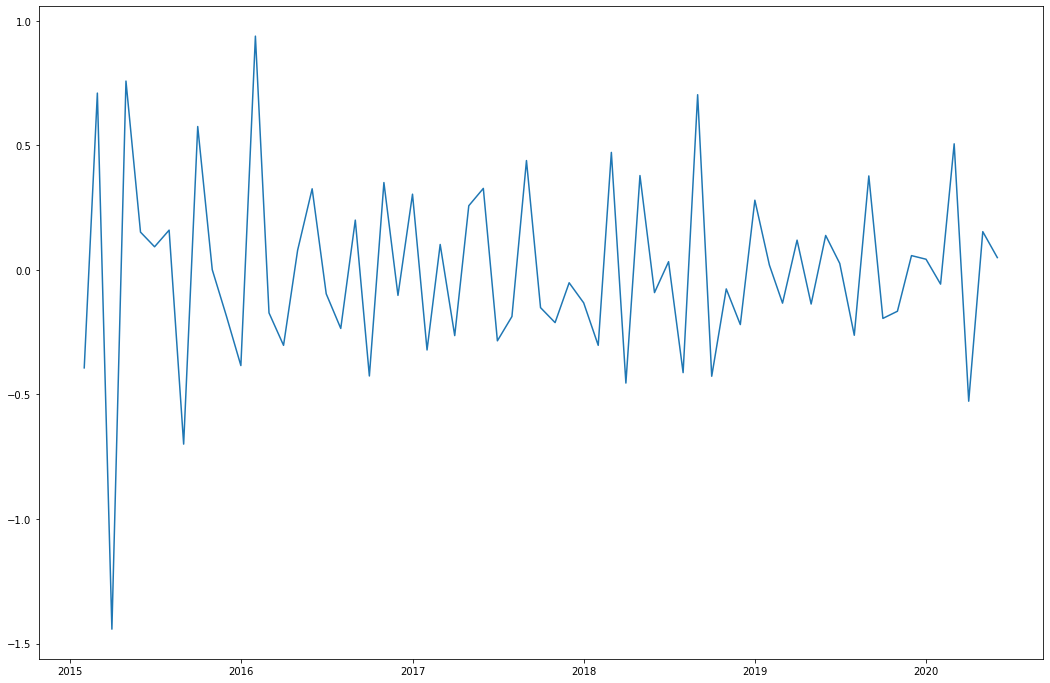

In [ ]:
#Usaremos a função shift do pandas para fazer a diferenciação de primeira ordem, e logo em seguida fazer o "drop" do valor nulo para utilizar no teste ADF
media_sp_acucar_diff1 = media_sp_acucar_log - media_sp_acucar_log.shift()
media_sp_acucar_diff1.dropna(inplace = True)
plt.plot(media_sp_acucar_diff1)

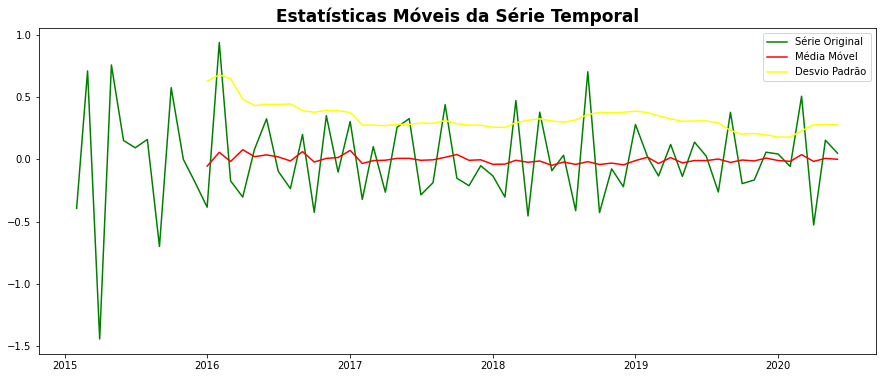


 RESULTADO DO TESTE ADF:

Estatística do Teste ADF                -9.916393e+00
p-value                                  3.071984e-17
Número de Lags Considerado pelo teste    2.000000e+00
Número de Observações Utilizadas         6.200000e+01
Valor Crítico (1%)                      -3.540523e+00
Valor Crítico (5%)                      -2.909427e+00
Valor Crítico (10%)                     -2.592314e+00
dtype: float64


In [ ]:
#Plot de Estatísticas Móveis
fig, ax = plt.subplots(figsize = (15,6))

rollingmean = media_sp_acucar_diff1.rolling(window = 12).mean()
rollingstd = media_sp_acucar_diff1.rolling(window = 12).std()

original = plt.plot(media_sp_acucar_diff1, color = 'green', label = 'Série Original')
media_movel = plt.plot(rollingmean, color = 'red', label = 'Média Móvel')
desvio_padrao = plt.plot(rollingstd, color = 'yellow', label = 'Desvio Padrão')
plt.legend(loc = 'best')
plt.title('Estatísticas Móveis da Série Temporal', fontsize = 17, fontweight = 'bold')
plt.show();

#Teste ADF

print('\n RESULTADO DO TESTE ADF:\n')

teste = adfuller(media_sp_acucar_diff1, autolag = 'AIC')
saida = pd.Series(teste[0:4], index = ['Estatística do Teste ADF', 'p-value', 'Número de Lags Considerado pelo teste', 'Número de Observações Utilizadas'])

for k,v in teste[4].items():
  saida['Valor Crítico (%s)'%k] = v

print(saida)

Agora sim, temos uma série considerada estacionária. O *p-value* está bem abaixo do 0.05, assim conseguiremos rejeitar nossa hipotese nula.

Agora iremos verificar como estão nossas autocorrelações através dos gráfico conhecido como "Pirulito".

Iremos fazer o plot do *Autocorrelation Function (ACF)* e do *Partial Autocorrelation Function (PACF)*.

Através deles iremos conseguir observar os paramêtros que iremos utilizar em nosso primeiro modelo, o ***ARIMA***.

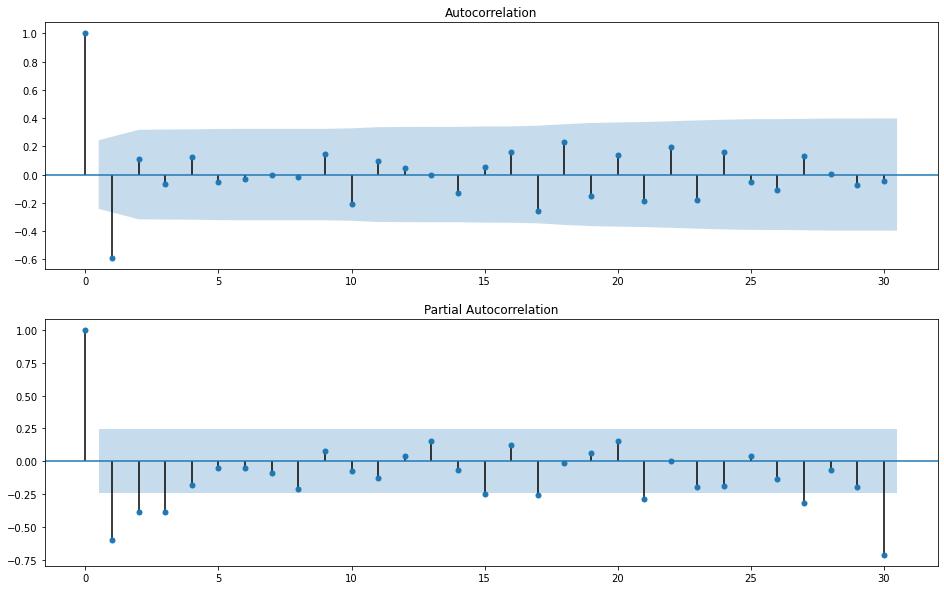

In [ ]:
# Plots
plt.rcParams.update({'figure.figsize': (16,10)})

# ACF
plt.subplot(211)
plot_acf(media_sp_acucar_diff1, ax = plt.gca(), lags = 30)

# PACF
plt.subplot(212)
plot_pacf(media_sp_acucar_diff1, ax = plt.gca(), lags = 30)
plt.show()

Bem resumidamente, o *ARIMA* se baseia em 3 paramêtros: p, d e q. Sendo o AR = p, I = d, MA = q.

Podemos fazer a escolha dos melhores paramêtros através dos gráficos de ACF e PACF ou através de um *grid search*. Vamos testar ambos e ver qual tem a melhor perfomance.

Bom, fizemos uma diferenciação de primeira ordem para deixar a nossa série estacionária, então já temos o valor de d, d = 1.

Observando o PACF, vemos que depois do 0, os valores 1,2,3 possuem *spikes* que são significantes (estão fora do azul claro), então já temos o p também, p = 3.

E por último, observando o ACF, vemos que, após o 0, apenas o valor 1 tem um spike significante, então concluímos com o valor do q, q = 1

Teremos um *ARIMA* com ordem (3,1,1) AR = 3, I = 1, MA = 1.

Agora vamos colocar a mão na massa, primeiro iremos separar o nossos dados em treino em teste. Assim iremos conseguir observar como os nosso modelos estão funcionando e quanto de erro eles estão cometendo. 

In [ ]:
#Separando dados de treino em teste 80/20
#Usaremos o nossos dados sem a diferenciação, pois o ARIMA quando I = 1 já diferencia os dados para nós.

X = media_sp_acucar_log
train_size = int(len(X) * 0.80)
trainset, testset = X[0:train_size], X[train_size:]
len(trainset), len(testset)

(52, 14)

In [ ]:
# Função para avaliarmos o modelo
def avalia_modelo(y_true, y_pred): 
    mse = ((y_pred - y_true) ** 2).mean()
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return( print('MSE das previsões é {}'.format(round(mse, 4))+
                  '\nRMSE das previsões é {}'.format(round(np.sqrt(mse), 4))+
                  '\nMAPE das previsões é {}'.format(round(mape, 4))))

In [ ]:
#Criando o modelo
modelo_ARIMA1 = ARIMA(trainset, order = (3,1,1))

In [ ]:
#Treinando o modelo
modelo_v1 = modelo_ARIMA1.fit(disp = -1)  

In [ ]:
#Observando o comportamento do nosso primeiro modelo
modelo_v1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 36.8744   
Dependent Variable: D.KG_LIQUIDO     Log-Likelihood:      -6.6417   
Date:               2020-08-18 08:45 Scale:               1.0000    
No. Observations:   51               Method:              css-mle   
Df Model:           5                Sample:              02-01-2015
Df Residuals:       46                                    04-01-2019
Converged:          1.0000           S.D. of innovations: 0.271     
No. Iterations:     32.0000          HQIC:                29.713    
AIC:                25.2835                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                -0.0033   0.0100 -0.3333 0.7389 -0.0229  0.0162
ar.L1.D.KG_LIQUIDO   -0.6694   0.2876 -2.3279 0.0199 -1.2331 -0.1058
ar.L2.D.KG_LIQUIDO   -0.4573   0.2664 -1.7166 0.0861 -0.9794  0.0648
ar.L3.D.KG_LIQUIDO   -0.3883   0.1976 -1.9646 0.0495 -0.7756 -0.0009
ma.L1.D.KG_LIQUIDO   -0.3633   0.3051 -1.1906 0.2338 -0.9613  0.2348
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -1.3334            -0.0000           1.3334            -0.5000
AR.2            0.0778            -1.3877           1.3898            -0.2411
AR.3            0.0778             1.3877           1.3898             0.2411
MA.1            2.7526             0.0000           2.7526             0.0000
====================================================================

"""

In [ ]:
#Vamos começar nossa primeira previsão e ver como o modelo se comporta
fc, se, conf = modelo_v1.forecast(len(testset), alpha = 0.05) 

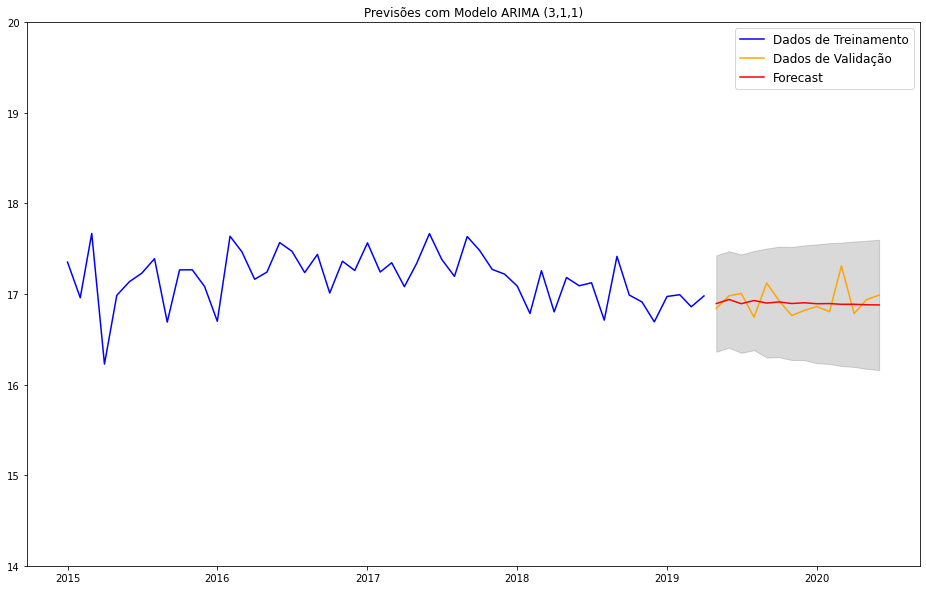

In [ ]:
# Vamos fazer o plot de nosso forecast
fc_series = pd.Series(fc, index = testset.index)
limite_inferior = pd.Series(conf[:, 0], index = testset.index)
limite_superior = pd.Series(conf[:, 1], index = testset.index)


plt.plot(trainset, label = 'Dados de Treinamento', color = 'blue')
plt.plot(testset, label = 'Dados de Validação', color = 'orange')
plt.plot(fc_series, label = 'Forecast', color = 'red')
plt.fill_between(limite_inferior.index, limite_inferior, limite_superior, color = 'k', alpha = .15)
plt.title('Previsões com Modelo ARIMA (3,1,1)')
plt.legend(loc = 'best', fontsize = 12)
plt.ylim(14,20)
plt.show()

In [ ]:
#Avaliação do modelo
avalia_modelo(testset, fc_series)

MSE das previsões é 0.0243
RMSE das previsões é 0.1559
MAPE das previsões é 0.6964


Temos a previsão e avaliação do nosso primeiro modelo.

Porém não podemos esquecer uma métrica muito importante, o AIC. Nosso AIC foi dado quando utilizamos o *summary* e o valor é **"25.2835"**.

Temos então, ARIMA(3,1,1):
- MSE = 0.0243
- RMSE = 0.1559
- MAPE = 0.6964
- AIC = 25.2835

Agora, como supracitado, vamos utilizar o *grid search* para achar os melhores paramêtros e ver ele consegue reduzir ainda mais o nosso erro sem aumentar o AIC.

In [ ]:
#Gridsearch para achar os melhores paramêtros

melhor_aic = np.inf 
melhor_order = None
melhor_modelo = None

# Valores para testar a melhor combinação order = (p,d,q):
# Usando o princípio da parcimônia, vamos utilizar valores de 0 a 3.
valores_para_pdq = [0,1,2,3]

# Loop de nosso modelo
for p in valores_para_pdq:
    for d in valores_para_pdq:
      for q in valores_para_pdq:
        try:
            tmp_mdl = ARIMA(trainset, order = (p,d,q)).fit(disp = False)
            tmp_aic = tmp_mdl.aic
            if tmp_aic < melhor_aic:
                melhor_aic = tmp_aic
                melhor_order = (p, d, q)
                melhor_modelo = tmp_mdl
        except: continue

# Print
print('\nMelhor Valor de AIC: %6.4f | order: %s'%(melhor_aic, melhor_order))
print('\nMelhor Modelo:', melhor_modelo.summary())


Melhor Valor de AIC: 23.0334 | order: (1, 0, 2)

Melhor Modelo:                               ARMA Model Results                              
Dep. Variable:             KG_LIQUIDO   No. Observations:                   52
Model:                     ARMA(1, 2)   Log Likelihood                  -6.517
Method:                       css-mle   S.D. of innovations              0.273
Date:                Tue, 18 Aug 2020   AIC                             23.033
Time:                        08:45:58   BIC                             32.790
Sample:                    01-01-2015   HQIC                            26.774
                         - 04-01-2019                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               17.1440      0.092    185.506      0.000      16.963      17.325
ar.L1.KG_LIQUIDO     0.8917      0.108      8.26

Através do *Grid Search* podemos observar que o menor valor de AIC vem de um modelo ***ARMA***, isto é, sem diferenciação, vamos treinar o modelo com os paramêtros dados por ele e ver como ele irá funcionar.

In [ ]:
#Criando o modelo
modelo_ARIMA2 = ARIMA(trainset, order = (1,0,2))

In [ ]:
#Treinando o modelo
modelo_v2 = modelo_ARIMA2.fit(disp = -1)  

In [ ]:
#Observando o comportamento do nosso segundo modelo
modelo_v2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 32.7896   
Dependent Variable: KG_LIQUIDO       Log-Likelihood:      -6.5167   
Date:               2020-08-18 08:45 Scale:               1.0000    
No. Observations:   52               Method:              css-mle   
Df Model:           4                Sample:              01-01-2015
Df Residuals:       48                                    04-01-2019
Converged:          1.0000           S.D. of innovations: 0.273     
No. Iterations:     18.0000          HQIC:                26.774    
AIC:                23.0334                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const               17.1440   0.0924 185.5061 0.0000 16.9628 17.3251
ar.L1.KG_LIQUIDO     0.8917   0.1079   8.2610 0.0000  0.6801  1.1032
ma.L1.KG_LIQUIDO    -0.9887   0.1789  -5.5272 0.0000 -1.3393 -0.6381
ma.L2.KG_LIQUIDO     0.2661   0.1489   1.7868 0.0740 -0.0258  0.5580
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.1215             0.0000           1.1215             0.0000
MA.1            1.8577            -0.5539           1.9385            -0.0461
MA.2            1.8577             0.5539           1.9385             0.0461
====================================================================

"""

In [ ]:
#Vamos começar nossa segunda previsão e ver como o modelo se comporta
fc2, se2, conf2 = modelo_v2.forecast(len(testset), alpha = 0.05) 

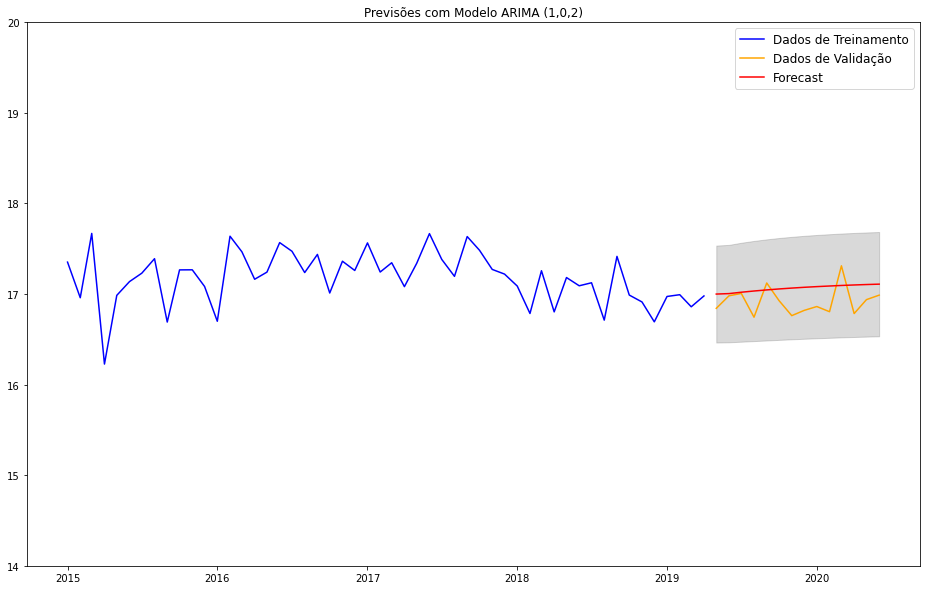

In [ ]:
# Vamos fazer o plot de nosso forecast
fc_series2 = pd.Series(fc2, index = testset.index)
limite_inferior = pd.Series(conf2[:, 0], index = testset.index)
limite_superior = pd.Series(conf2[:, 1], index = testset.index)


plt.plot(trainset, label = 'Dados de Treinamento', color = 'blue')
plt.plot(testset, label = 'Dados de Validação', color = 'orange')
plt.plot(fc_series2, label = 'Forecast', color = 'red')
plt.fill_between(limite_inferior.index, limite_inferior, limite_superior, color = 'k', alpha = .15)
plt.title('Previsões com Modelo ARIMA (1,0,2)')
plt.legend(loc = 'best', fontsize = 12)
plt.ylim(14,20)
plt.show()

In [ ]:
#Avaliação do modelo
avalia_modelo(testset, fc_series2)

MSE das previsões é 0.0434
RMSE das previsões é 0.2082
MAPE das previsões é 1.089


Conseguimos diminuir o AIC, porém aumentamos **todos** os outros erros.

Nosso *grid search* mostrou que nosso melhor modelo, como supracitado, se da com o modelo ***ARMA***, isto é, sem diferenciação. Porém quando fizemos o teste ADF, vimos que a série era não estacionária quando não diferenciada, e ao diferenciar em primeira ordem ela ficava estacionária. Retirando esses insights vamos fazer a junção dos 2, grid search e o que observamos com nossas análises exploratórias de séries temporais. Vamos travar o valor de **"d" em 1 e 2**, e ver como nosso *grid search* reage ao procurar os paramêtros.

Temos então, **ARIMA(1,0,2)**:
- MSE = 0.0434
- RMSE = 0.2082
- MAPE = 1.089
- AIC = 23.0334

In [ ]:
#Gridsearch para achar os melhores parâmetros

melhor_aic = np.inf 
melhor_order = None
melhor_modelo = None

# Valores para testar a melhor combinação order = (p,d,q):
# Usando o princípio da parcimônia, vamos utilizar valores de 0 a 3.
valores_para_pq = [0,1,2,3]
valor_para_d = [1,2]
# Loop de nosso modelo
for p in valores_para_pdq:
    for d in valor_para_d:
      for q in valores_para_pdq:
        try:
            tmp_mdl = ARIMA(trainset, order = (p,d,q)).fit(disp = False)
            tmp_aic = tmp_mdl.aic
            if tmp_aic < melhor_aic:
                melhor_aic = tmp_aic
                melhor_order = (p, d, q)
                melhor_modelo = tmp_mdl
        except: continue

# Print
print('\nMelhor Valor de AIC: %6.4f | order: %s'%(melhor_aic, melhor_order))
print('\nMelhor Modelo:', melhor_modelo.summary())


Melhor Valor de AIC: 23.7751 | order: (0, 1, 2)

Melhor Modelo:                              ARIMA Model Results                              
Dep. Variable:           D.KG_LIQUIDO   No. Observations:                   51
Model:                 ARIMA(0, 1, 2)   Log Likelihood                  -7.888
Method:                       css-mle   S.D. of innovations              0.279
Date:                Tue, 18 Aug 2020   AIC                             23.775
Time:                        09:25:51   BIC                             31.502
Sample:                    02-01-2015   HQIC                            26.728
                         - 04-01-2019                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0038      0.009     -0.440      0.660      -0.021       0.013
ma.L1.D.KG_LIQUIDO    -1.0489      0.147  

Obtivemos um AIC menor que do nosso primeiro modelo, vamos continuar e ver como ficarão os erros.

In [ ]:
#Criando o modelo
modelo_ARIMA3 = ARIMA(trainset, order = (0, 1,2))

In [ ]:
#Treinando o modelo
modelo_v3 = modelo_ARIMA3.fit(disp = -1)  

In [ ]:
#Observando o comportamento do nosso terceiro modelo
modelo_v3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 31.5024   
Dependent Variable: D.KG_LIQUIDO     Log-Likelihood:      -7.8876   
Date:               2020-08-18 08:46 Scale:               1.0000    
No. Observations:   51               Method:              css-mle   
Df Model:           3                Sample:              02-01-2015
Df Residuals:       48                                    04-01-2019
Converged:          1.0000           S.D. of innovations: 0.279     
No. Iterations:     19.0000          HQIC:                26.728    
AIC:                23.7751                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                -0.0038   0.0087 -0.4402 0.6598 -0.0210  0.0133
ma.L1.D.KG_LIQUIDO   -1.0489   0.1467 -7.1506 0.0000 -1.3364 -0.7614
ma.L2.D.KG_LIQUIDO    0.2612   0.1465  1.7828 0.0746 -0.0260  0.5484
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
MA.1            1.5576             0.0000           1.5576             0.0000
MA.2            2.4576             0.0000           2.4576             0.0000
====================================================================

"""

In [ ]:
#Vamos começar nossa terceira previsão e ver como o modelo se comporta
fc3, se3, conf3 = modelo_v3.forecast(len(testset), alpha = 0.05) 

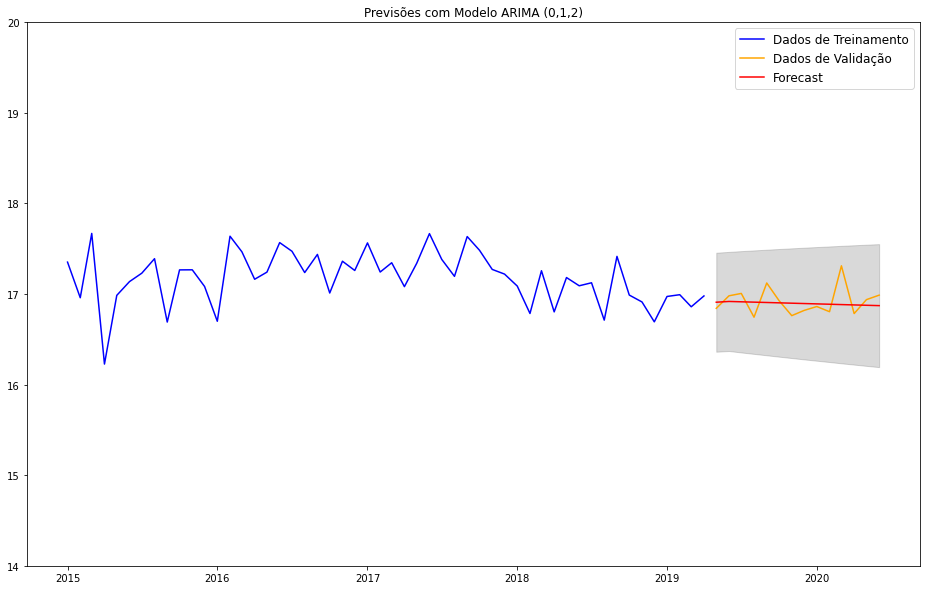

In [ ]:
# Vamos fazer o plot de nosso forecast
fc_series3 = pd.Series(fc3, index = testset.index)
limite_inferior = pd.Series(conf3[:, 0], index = testset.index)
limite_superior = pd.Series(conf3[:, 1], index = testset.index)


plt.plot(trainset, label = 'Dados de Treinamento', color = 'blue')
plt.plot(testset, label = 'Dados de Validação', color = 'orange')
plt.plot(fc_series3, label = 'Forecast', color = 'red')
plt.fill_between(limite_inferior.index, limite_inferior, limite_superior, color = 'k', alpha = .15)
plt.title('Previsões com Modelo ARIMA (0,1,2)')
plt.legend(loc = 'best', fontsize = 12)
plt.ylim(14,20)
plt.show()

In [ ]:
#Avaliação do modelo
avalia_modelo(testset, fc_series3)

MSE das previsões é 0.0238
RMSE das previsões é 0.1543
MAPE das previsões é 0.6949


Maravilha, **conseguimos o melhor trade off entre os erros e o AIC** utilizando a junção de nosso *grid search* com nossa análise exploratória.

Temos então, ARIMA(0,1,2):
- MSE = 0.0238
- RMSE = 0.1543
- MAPE = 0.6949
- AIC = 23.7751


**Comparação dos modelos**:

**ARIMA(3,1,1):**
- MSE = 0.0243
- RMSE = 0.1559
- MAPE = 0.6964
- AIC = 25.2835

**ARIMA(1,0,2):**
- MSE = 0.0434
- RMSE = 0.2082
- MAPE = 1.089
- AIC = 23.0334

**ARIMA(0,1,2):**
- MSE = 0.0238
- RMSE = 0.1543
- MAPE = 0.6949
- AIC = 23.7751

**MELHOR TRADE OFF: ARIMA(0,1,2)**


Ótimo.

Encontramos o melhor modelo ***ARIMA***, que é um modelo que leva mais em conta a tendência de nossa série. 

Agora vamos aplicar o ***SARIMA***, que leva em conta a sazonalidade de nossa série temporal, através dela conseguiremos ver como é a sazonalidade do nosso modelo e como ela pode nos ajudar a aplicar o modelo.

O Modelo ***SARIMA*** possui os paramêtros, P,D,Q,M. 

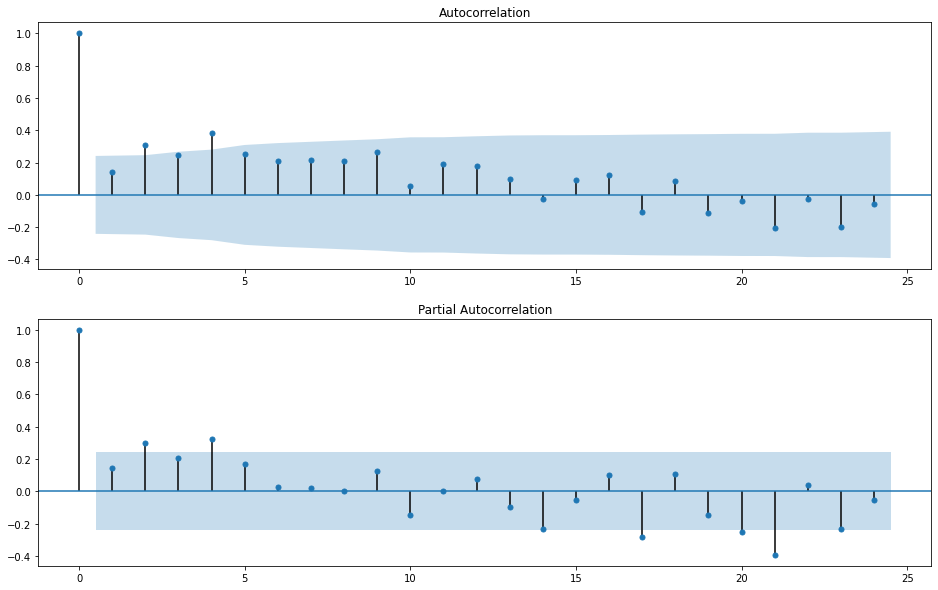

In [ ]:
# Plots
plt.rcParams.update({'figure.figsize': (16,10)})

# ACF
plt.subplot(211)
plot_acf(media_sp_acucar_log, ax = plt.gca(), lags = 24)

# PACF
plt.subplot(212)
plot_pacf(media_sp_acucar_log, ax = plt.gca(), lags = 24)
plt.show()

Através dos gráficos de autocorrelação, em nossos dados sem diferenciação, vemos que não há nenhum *spike* que está muito acima do nível de significância (com exceção do momento 0).

O maior spike é o do momento 4, e ele que usaremos como nosso M em nosso modelo *SARIMA*.

Para nos auxiliar há escolher os melhores parâmetros para os nossos modelos iremos utilizar o *grid search* na tentativa de diminuir nosso AIC.


In [ ]:
#Seguindo o principio da parcimônia iremos utilizar 0 e 1 como nossos parâmetros
p = d = q = range(0, 2)

In [ ]:
pdq = list(itertools.product(p, d, q))
#iremos colocar o nosso valor de D como 1 para evitar que ele não utilize a Sazonalidade na hora do Grid Search
seasonal_pdq = [(x[0], 1, x[2], 4) for x in list(itertools.product(p, d, q))]
pdq, seasonal_pdq

([(0, 0, 0),
  (0, 0, 1),
  (0, 1, 0),
  (0, 1, 1),
  (1, 0, 0),
  (1, 0, 1),
  (1, 1, 0),
  (1, 1, 1)],
 [(0, 1, 0, 4),
  (0, 1, 1, 4),
  (0, 1, 0, 4),
  (0, 1, 1, 4),
  (1, 1, 0, 4),
  (1, 1, 1, 4),
  (1, 1, 0, 4),
  (1, 1, 1, 4)])

In [ ]:
# GRID SEARCH buscando o valor mínimo do AIC
lowest_aic = sys.maxsize
lowest = ''

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(trainset,
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)
            results = mod.fit()
            print('SARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
            if lowest_aic >  results.aic:
                lowest = 'SARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic)
                lowest_aic = results.aic
        except:
            continue

print ("\nModelo com Menor Valor de AIC: " + lowest)

SARIMA(0, 0, 0)x(0, 1, 0, 4)4 - AIC:25.97104673622127
SARIMA(0, 0, 0)x(0, 1, 1, 4)4 - AIC:6.901907998337067
SARIMA(0, 0, 0)x(0, 1, 0, 4)4 - AIC:25.97104673622127
SARIMA(0, 0, 0)x(0, 1, 1, 4)4 - AIC:6.901907998337067
SARIMA(0, 0, 0)x(1, 1, 0, 4)4 - AIC:9.46483071916079
SARIMA(0, 0, 0)x(1, 1, 1, 4)4 - AIC:9.783011289473954
SARIMA(0, 0, 0)x(1, 1, 0, 4)4 - AIC:9.46483071916079
SARIMA(0, 0, 0)x(1, 1, 1, 4)4 - AIC:9.783011289473954
SARIMA(0, 0, 1)x(0, 1, 0, 4)4 - AIC:27.47127994721462
SARIMA(0, 0, 1)x(0, 1, 1, 4)4 - AIC:8.03011040349038
SARIMA(0, 0, 1)x(0, 1, 0, 4)4 - AIC:27.47127994721462
SARIMA(0, 0, 1)x(0, 1, 1, 4)4 - AIC:8.03011040349038
SARIMA(0, 0, 1)x(1, 1, 0, 4)4 - AIC:11.028714262439832
SARIMA(0, 0, 1)x(1, 1, 1, 4)4 - AIC:11.568226292642318
SARIMA(0, 0, 1)x(1, 1, 0, 4)4 - AIC:11.028714262439832
SARIMA(0, 0, 1)x(1, 1, 1, 4)4 - AIC:11.568226292642318
SARIMA(0, 1, 0)x(0, 1, 0, 4)4 - AIC:63.55167346440903
SARIMA(0, 1, 0)x(0, 1, 1, 4)4 - AIC:28.21297518529726
SARIMA(0, 1, 0)x(0, 1, 0, 4)

Maravilha, achamos um AIC menor que o do nossos modelos *ARIMA*. E interessante como ele deixou a parte ***ARIMA do modelo zerada (0,0,0)*** e utilizou apenas a parte da sazonalidade.

Vamos ver como fica as outras métricas e se o nosso trade off foi bom.

In [ ]:
modelo_sarima_v1 = sm.tsa.statespace.SARIMAX(trainset,
                                             order = (0,0,0),
                                             seasonal_order = (0,1,1,4),
                                             enforce_stationarity = False,
                                             enforce_invertibility = False)

In [ ]:
modelo_sarima_v1_fit = modelo_sarima_v1.fit()

In [ ]:
modelo_sarima_v1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                KG_LIQUIDO   No. Observations:                   52
Model:             SARIMAX(0, 1, [1], 4)   Log Likelihood                  -1.451
Date:                   Tue, 18 Aug 2020   AIC                              6.902
Time:                           08:46:08   BIC                             10.424
Sample:                       01-01-2015   HQIC                             8.201
                            - 04-01-2019                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L4       -0.3065      0.193     -1.590      0.112      -0.684       0.071
sigma2         0.0626      0.012      5.043      0.000       0.038       0.087
===================================================================================
Ljung-Box (Q):                       44.09   Jarque-Bera (JB):                 1.73
Prob(Q):                              0.30   Prob(JB):                         0.42
Heteroskedasticity (H):               0.61   Skew:                            -0.38
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

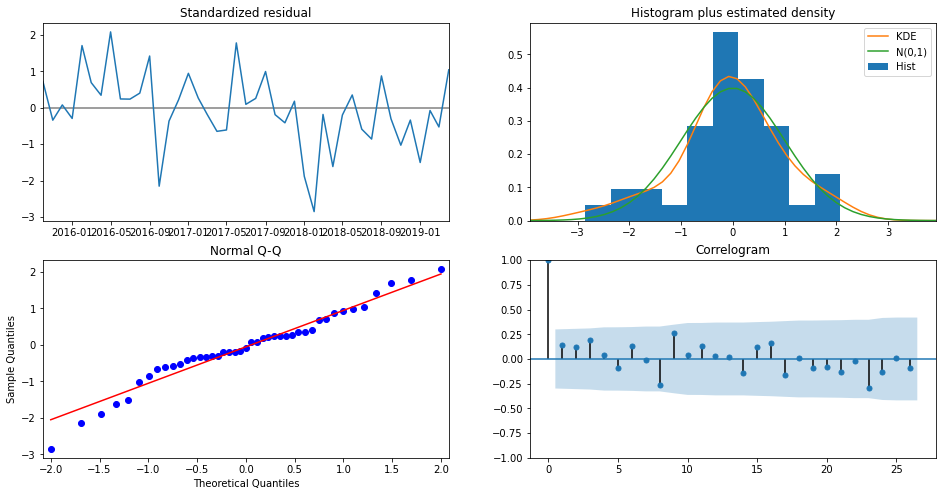

In [ ]:
modelo_sarima_v1_fit.plot_diagnostics(lags = 26, figsize = (16,8))
plt.show();

O resíduo do nosso modelo está normalmente distribuido, mostrando que a média dele é 0 e desvio padrão 1.

Nosso gráfico QQ segue uma tendência linear, confirmando que nossos resíduos são normalmente distríbuidos, além de que nosso correlogram mostra que os resíduos não possuem correlação significativa entre si.

Aparentemente o modelo está muito bom, vamos para as previsões.

In [ ]:
#confirmar qual é a última data do nossos dados de treino
trainset.tail()

Date
2018-12-01    16.692763
2019-01-01    16.972735
2019-02-01    16.992282
2019-03-01    16.858970
2019-04-01    16.978569
Freq: MS, Name: KG_LIQUIDO, dtype: float64

In [ ]:
# Vamos fazer previsões um passo a frente
sarima_predict_1 = modelo_sarima_v1_fit.get_prediction(start = pd.to_datetime('2019-05-01'), 
                                                       end = pd.to_datetime('2020-06-01'),
                                                       dynamic = False)

In [ ]:
# Intervalo de confiança
sarima_predict_conf_1 = sarima_predict_1.conf_int()
sarima_predict_conf_1

,lower KG_LIQUIDO,upper KG_LIQUIDO
2019-05-01,16.597511,17.578168
2019-06-01,16.507837,17.488494
2019-07-01,16.409064,17.389720
2019-08-01,16.408590,17.389247
2019-09-01,16.491146,17.684532
2019-10-01,16.401472,17.594858
2019-11-01,16.302699,17.496085
2019-12-01,16.302225,17.495611
2020-01-01,16.401062,17.774616
2020-02-01,16.311388,17.684943


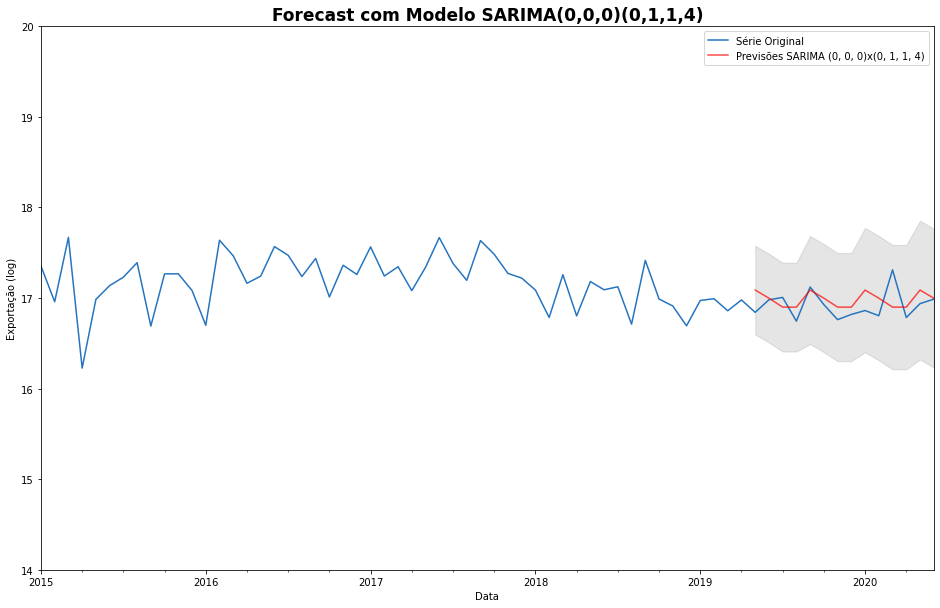

In [ ]:
ax = media_sp_acucar_log.plot(label = 'Série Original', color = '#2574BF')

sarima_predict_1.predicted_mean.plot(ax = ax, 
                                     label = 'Previsões SARIMA (0, 0, 0)x(0, 1, 1, 4)', 
                                     alpha = 0.7, 
                                     color = 'red') 

# Intervalo de confiança
ax.fill_between(sarima_predict_conf_1.index,
                # lower sales
                sarima_predict_conf_1.iloc[:, 0],
                # upper sales
                sarima_predict_conf_1.iloc[:, 1], color = 'k', alpha = 0.1)
ax.set_ylim(14,20)

plt.title('Forecast com Modelo SARIMA(0,0,0)(0,1,1,4)', fontsize = 17, fontweight = 'bold')
plt.xlabel('Data')
plt.ylabel('Exportação (log)')
plt.legend()
plt.show()

In [ ]:
sarima_resultado_v1 = avalia_modelo(testset, sarima_predict_1.predicted_mean)

MSE das previsões é 0.0301
RMSE das previsões é 0.1736
MAPE das previsões é 0.8247


Aumentamos um pouco nossos erros, porém nosso AIC caiu muito. O que é um **ótimo *trade off***.

O RMSE avalia o nosso modelo com base nos dados que temos, no caso nos dados de teste. Já o AIC faz a sua avaliação como uma perfomance global do seu modelo, e a capacidade que este tem para previsão com novos dados, que é o que buscamos.

In [ ]:
#tamanho do dataset de teste
len(testset)

14

Como queremos prever o próximo ano, e os nossos dados de teste só vai até junho. Vamos fazer o teste de LJung Box para verificar se há falha de ajuste na hora de prevermos nossos lags, que serão 14 (tamanho do dataset de teste) + 12 (um ano pra frente que queremos prever), dando um total de 26 lags.

O LJung-Box trabalha com a hipótese nula de que os resíduos são dependentes(não são aleatórios) e hipótese alternativa de que não são dependentes (são aleatórios).

- H0 - são dependentes
- H1 - são independentes

In [ ]:
# Teste de Ljung-Box
resultado_teste_1 = sms.diagnostic.acorr_ljungbox(modelo_sarima_v1_fit.resid, lags = [26], boxpierce = False)
print('Valor-p =', resultado_teste_1[1])

Valor-p = [0.00467854]


Falhamos em rejeitar a hipótese nula, ao tentar predizer nossos dados para o ano que vem não são aleatórios e independentes ao longo do tempo.

Talvez seja por causa da tendência. Vamos tentar diferenciar nossos dados travando a tendência e não apenas a Sazonalidade como fizemos no primeiro modelo SARIMA.

In [ ]:
pdq2 = [(x[0], 1, x[2]) for x in list(itertools.product(p, d, q))]
#iremos colocar o nosso valor de D como 1 para evitar que ele não utilize a Sazonalidade na hora do Grid Search
seasonal_pdq = [(x[0], 1, x[2], 4) for x in list(itertools.product(p, d, q))]
pdq2, seasonal_pdq

([(0, 1, 0),
  (0, 1, 1),
  (0, 1, 0),
  (0, 1, 1),
  (1, 1, 0),
  (1, 1, 1),
  (1, 1, 0),
  (1, 1, 1)],
 [(0, 1, 0, 4),
  (0, 1, 1, 4),
  (0, 1, 0, 4),
  (0, 1, 1, 4),
  (1, 1, 0, 4),
  (1, 1, 1, 4),
  (1, 1, 0, 4),
  (1, 1, 1, 4)])

In [ ]:
# GRID SEARCH buscando o valor mínimo do AIC
lowest_aic = sys.maxsize
lowest = ''

#pdq2 agora!
for param in pdq2:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(trainset,
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)
            results = mod.fit()
            print('SARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
            if lowest_aic >  results.aic:
                lowest = 'SARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic)
                lowest_aic = results.aic
        except:
            continue

print ("\nModelo com Menor Valor de AIC: " + lowest)

SARIMA(0, 1, 0)x(0, 1, 0, 4)4 - AIC:63.55167346440903
SARIMA(0, 1, 0)x(0, 1, 1, 4)4 - AIC:28.21297518529726
SARIMA(0, 1, 0)x(0, 1, 0, 4)4 - AIC:63.55167346440903
SARIMA(0, 1, 0)x(0, 1, 1, 4)4 - AIC:28.21297518529726
SARIMA(0, 1, 0)x(1, 1, 0, 4)4 - AIC:33.98779560284612
SARIMA(0, 1, 0)x(1, 1, 1, 4)4 - AIC:32.58292760910171
SARIMA(0, 1, 0)x(1, 1, 0, 4)4 - AIC:33.98779560284612
SARIMA(0, 1, 0)x(1, 1, 1, 4)4 - AIC:32.58292760910171
SARIMA(0, 1, 1)x(0, 1, 0, 4)4 - AIC:30.68966316838476
SARIMA(0, 1, 1)x(0, 1, 1, 4)4 - AIC:7.636496418343091
SARIMA(0, 1, 1)x(0, 1, 0, 4)4 - AIC:30.68966316838476
SARIMA(0, 1, 1)x(0, 1, 1, 4)4 - AIC:7.636496418343091
SARIMA(0, 1, 1)x(1, 1, 0, 4)4 - AIC:15.472388054559035
SARIMA(0, 1, 1)x(1, 1, 1, 4)4 - AIC:12.873348825190241
SARIMA(0, 1, 1)x(1, 1, 0, 4)4 - AIC:15.472388054559035
SARIMA(0, 1, 1)x(1, 1, 1, 4)4 - AIC:12.873348825190241
SARIMA(0, 1, 0)x(0, 1, 0, 4)4 - AIC:63.55167346440903
SARIMA(0, 1, 0)x(0, 1, 1, 4)4 - AIC:28.21297518529726
SARIMA(0, 1, 0)x(0, 1, 0

Aumentamos um pouco nosso AIC, mas vamos verificar como nosso modelo está.

In [ ]:
modelo_sarima_v2 = sm.tsa.statespace.SARIMAX(trainset,
                                             order = (0,1,1),
                                             seasonal_order = (0,1,1,4),
                                             enforce_stationarity = False,
                                             enforce_invertibility = False)

In [ ]:
modelo_sarima_v2_fit = modelo_sarima_v2.fit()

In [ ]:
modelo_sarima_v2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        KG_LIQUIDO   No. Observations:                   52
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                  -0.818
Date:                           Tue, 18 Aug 2020   AIC                              7.636
Time:                                   08:46:14   BIC                             12.777
Sample:                               01-01-2015   HQIC                             9.508
                                    - 04-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8013      0.111     -7.241      0.000      -1.018      -0.584
ma.S.L4       -0.5770      0.178     -3.243      0.001      -0.926      -0.228
sigma2         0.0597      0.012      4.990      0.000       0.036       0.083
===================================================================================
Ljung-Box (Q):                       46.09   Jarque-Bera (JB):                 2.33
Prob(Q):                              0.23   Prob(JB):                         0.31
Heteroskedasticity (H):               0.44   Skew:                            -0.45
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

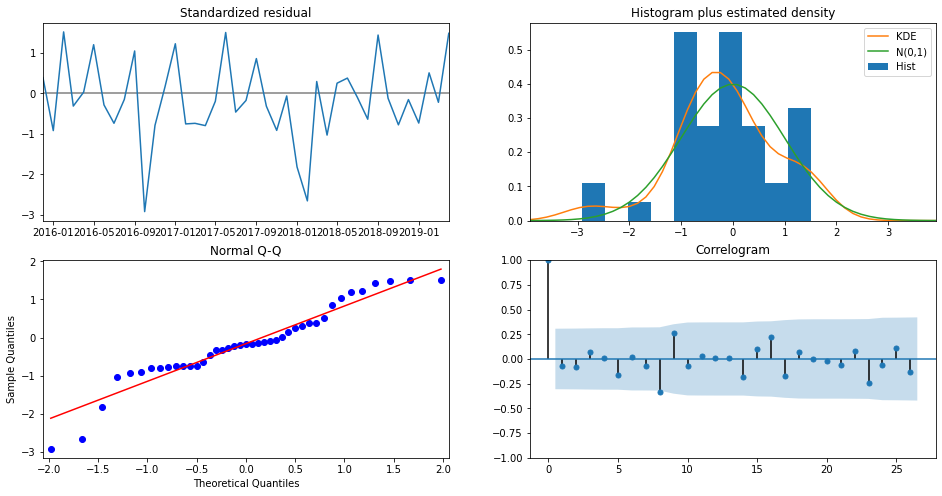

In [ ]:
modelo_sarima_v2_fit.plot_diagnostics(lags = 26, figsize = (16,8))
plt.show();

Vamos ver como está nosso teste LJung-Box antes de continuar o modelo.

In [ ]:
# Teste de Ljung-Box
resultado_teste_2 = sms.diagnostic.acorr_ljungbox(modelo_sarima_v2_fit.resid, lags = [26], boxpierce = False)
print('Valor-p =', resultado_teste_2[1])

Valor-p = [0.99358543]


Dessa vez conseguimos rejeitar a hipótese nula, e temos um modelo com resíduos independentes e aleatórios.
Vamos continuar com nosso modelo.

In [ ]:
# Vamos fazer previsões um passo a frente
sarima_predict_2 = modelo_sarima_v2_fit.get_prediction(start = pd.to_datetime('2019-05-01'), 
                                                       end = pd.to_datetime('2020-06-01'),
                                                       dynamic = False)

In [ ]:
# Intervalo de confiança
sarima_predict_conf_2 = sarima_predict_2.conf_int()
sarima_predict_conf_2

,lower KG_LIQUIDO,upper KG_LIQUIDO
2019-05-01,16.575864,17.533574
2019-06-01,16.432092,17.408536
2019-07-01,16.377802,17.372625
2019-08-01,16.254756,17.267624
2019-09-01,16.417014,17.591968
2019-10-01,16.267199,17.472972
2019-11-01,16.207074,17.442897
2019-12-01,16.078382,17.343541
2020-01-01,16.237040,17.671485
2020-02-01,16.081428,17.558286


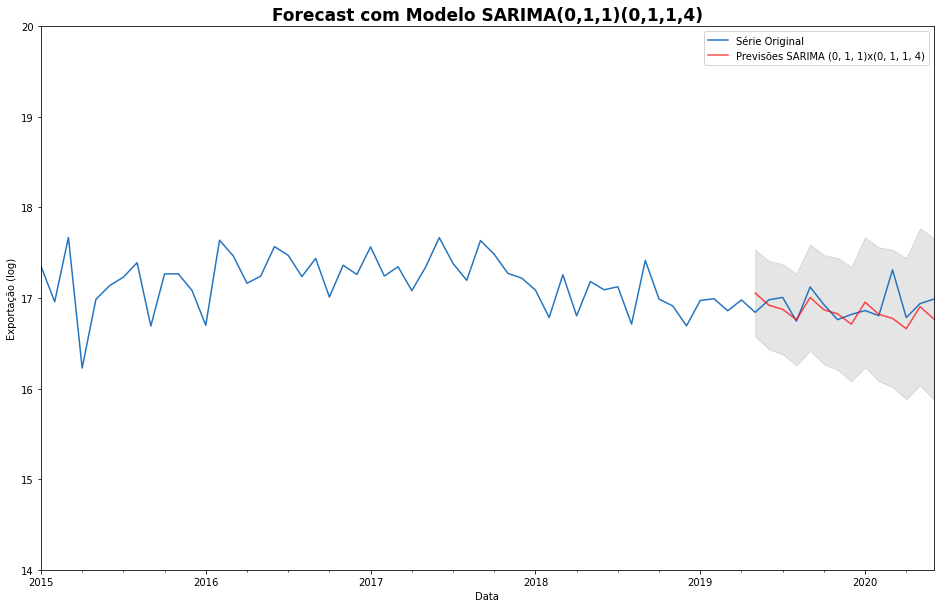

In [ ]:
ax = media_sp_acucar_log.plot(label = 'Série Original', color = '#2574BF')

sarima_predict_2.predicted_mean.plot(ax = ax, 
                                     label = 'Previsões SARIMA (0, 1, 1)x(0, 1, 1, 4)', 
                                     alpha = 0.7, 
                                     color = 'red') 

# Intervalo de confiança
ax.fill_between(sarima_predict_conf_2.index,
                sarima_predict_conf_2.iloc[:, 0],
                sarima_predict_conf_2.iloc[:, 1], color = 'k', alpha = 0.1)
ax.set_ylim(14,20)

plt.title('Forecast com Modelo SARIMA(0,1,1)(0,1,1,4)', fontsize = 17, fontweight = 'bold')
plt.xlabel('Data')
plt.ylabel('Exportação (log)')
plt.legend()
plt.show()

In [ ]:
avalia_modelo(testset, sarima_predict_2.predicted_mean)

MSE das previsões é 0.0328
RMSE das previsões é 0.1811
MAPE das previsões é 0.7489


Diminuímos nosso MAPE, porém nosso MSE e RMSE cresceram, junto com o AIC. Porém o nosso teste Ljung-Box conseguiu rejeitar a hipótese nula, **tendo um modelo com resíduos independentes e aleatórios**.

**Comparação dos modelos**:

**ARIMA(3,1,1):**
- MSE = 0.0243
- RMSE = 0.1559
- MAPE = 0.6964
- AIC = 25.2835

**ARIMA(1,0,2):**
- MSE = 0.0434
- RMSE = 0.2082
- MAPE = 1.089
- AIC = 23.0334

**ARIMA(0,1,2):**
- MSE = 0.0238
- RMSE = 0.1543
- MAPE = 0.6949
- AIC = 23.7751

**SARIMA(0,0,0)x(0,1,1)4**
- MSE = 0.0301
- RMSE = 0.1736
- MAPE = 0.8247
- AIC = 6.902

**SARIMA(0,1,1)x(0,1,1)4**
- MSE = 0.0328
- RMSE = 0.1811
- MAPE = 0.7489
- AIC = 7.636

**MELHOR TRADE OFF: SARIMA(0,1,1)x(0,1,1)4 - Devido ao Ljung-Box rejeitando a hipótese nula**



Para finalizarmos nossos modelos, iremos agora utilizar a biblioteca do Facebook, Prophet, para o forecast de nossa série temporal.

Essa é uma biblioteca que está chamando atenção da indústria devido a sua facilidade de uso aliado a sua perfomance que em algumas séries temporais são muito boas.

No modelo prophet, o dataset deve conter apenas duas colunas e com os nomes de "ds", para nossas datas, e y para nossa varíavel target.

Vamos começar então preparando nossos dados para utilizar o Prophet

In [ ]:
df_treino = pd.DataFrame({'ds': trainset.index, 'y': trainset.values})
df_teste = pd.DataFrame({'ds':testset.index, 'y':testset.values})

Dados preparados, vamos criar nosso modelo.

Aqui colocaremos em seu paramêtro de sazonalidade o *yearly_seasonality* como True, devido ao nossos dados serem mensais, as outras sazonalidades são relacionadas a semana e aos dias.

In [ ]:
modelo_prophet = Prophet(interval_width= 0.95, yearly_seasonality= True)
modelo_prophet.fit(df_treino)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Modelo treinado. Fácil, não?

Agora temos que preparar o nosso dataset para fazer as previsões

In [ ]:
#periods deve ser igual ao número de meses do nosso dataset de test
df_previsoes = modelo_prophet.make_future_dataframe(periods = len(testset), freq = 'MS')
df_previsoes.count()

ds    66
dtype: int64

In [ ]:
#Forecast
forecast_prophet = modelo_prophet.predict(df_previsoes)

In [ ]:
#Resultado do forecast
forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
61,2020-02-01,16.911669,16.533194,17.278181
62,2020-03-01,16.769524,16.405283,17.158514
63,2020-04-01,16.497860,16.123544,16.850515
64,2020-05-01,16.592214,16.232992,16.987554
65,2020-06-01,16.870805,16.464468,17.248818


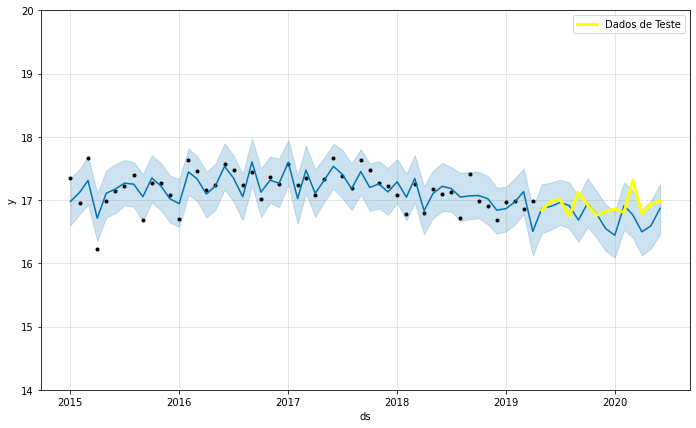

In [ ]:
#Vamos fazer o plot do nosso modelo de forecast
fig = modelo_prophet.plot(forecast_prophet)

plt.plot(testset, label = 'Dados de Teste', color = 'yellow', linewidth = 3)
plt.legend(loc='best')
plt.ylim(14,20)
plt.show()

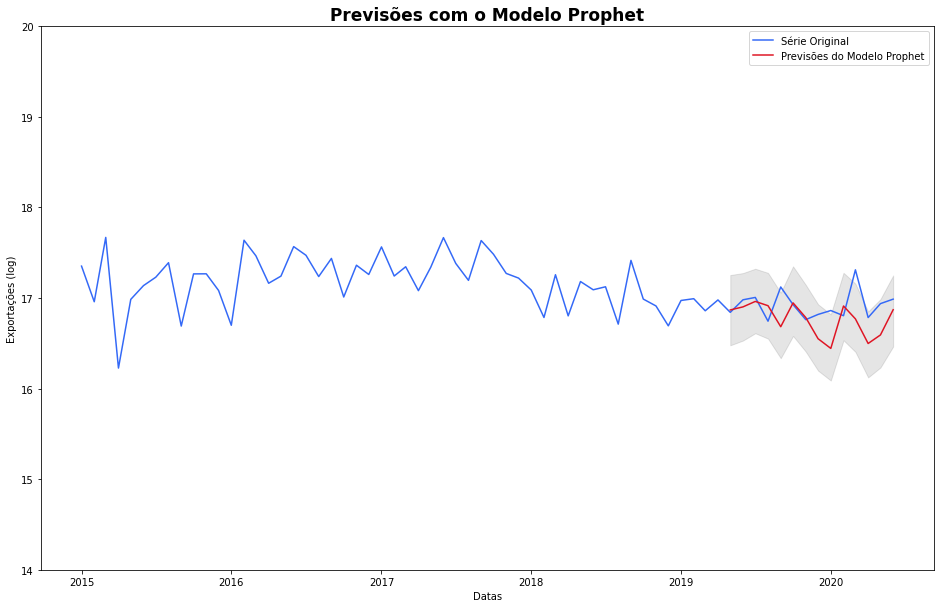

In [ ]:
#Plot

plt.plot(media_sp_acucar_log.index,
         media_sp_acucar_log.values,
         label = 'Série Original',
         color = '#3469F7')
plt.plot(media_sp_acucar_log.tail(14).index,
         forecast_prophet.tail(14)['yhat'].values,
         label = 'Previsões do Modelo Prophet',
         color = '#DF1524')
plt.legend(loc='best')

plt.fill_between(media_sp_acucar_log.tail(14).index,
                 forecast_prophet.tail(14)['yhat_lower'].values,
                 forecast_prophet.tail(14)['yhat_upper'].values,
                 color = 'k',
                 alpha = 0.1)
plt.ylim(14,20)
plt.title('Previsões com o Modelo Prophet', fontsize = 17, fontweight = 'bold')
plt.xlabel('Datas')
plt.ylabel('Exportações (log)')
plt.show();




In [ ]:
prophet_results = avalia_modelo(testset.values, forecast_prophet.tail(14)['yhat'])
prophet_results

MSE das previsões é 0.0712
RMSE das previsões é 0.2669
MAPE das previsões é 1.2127


O Modelo Prophet tem uma melhor acurácia para seríes temporais diárias, pois necessita de muitos dados para um forecast mais preciso. Neste caso ele não conseguiu bater nossos modelos de séries temporais ARIMA nem SARIMA nas métricas.



**Comparação dos modelos**:

**ARIMA(3,1,1):**
- MSE = 0.0243
- RMSE = 0.1559
- MAPE = 0.6964
- AIC = 25.2835

**ARIMA(1,0,2):**
- MSE = 0.0434
- RMSE = 0.2082
- MAPE = 1.089
- AIC = 23.0334

**ARIMA(0,1,2):**
- MSE = 0.0238
- RMSE = 0.1543
- MAPE = 0.6949
- AIC = 23.7751

**SARIMA(0,0,0)x(0,1,1)4**
- MSE = 0.0301
- RMSE = 0.1736
- MAPE = 0.8247
- AIC = 6.902

**SARIMA(0,1,1)x(0,1,1)4**
- MSE = 0.0328
- RMSE = 0.1811
- MAPE = 0.7489
- AIC = 7.636

**Prophet**
- MSE = 0.0712
- RMSE = 0.2669
- MAPE = 1.2127

**MELHOR TRADE OFF: SARIMA(0,1,1)x(0,1,1)4 - Devido ao Ljung-Box rejeitando a hipótese nula**

Nosso melhor modelo foi o SARIMA(0,1,1)x(0,1,1)4. Iremos utiliza-lo para fazer as previsões de um ano a frente e ver o que ele tem a nos dizer.

In [ ]:
#Forecast
predicao_1_ano = modelo_sarima_v2_fit.get_forecast(steps = len(testset) + 12)

In [ ]:
#Intervalo de confiança
predicao_1_ano_conf = predicao_1_ano.conf_int()
predicao_1_ano_conf

,lower KG_LIQUIDO,upper KG_LIQUIDO
2019-05-01,16.575864,17.533574
2019-06-01,16.432092,17.408536
2019-07-01,16.377802,17.372625
2019-08-01,16.254756,17.267624
2019-09-01,16.417014,17.591968
2019-10-01,16.267199,17.472972
2019-11-01,16.207074,17.442897
2019-12-01,16.078382,17.343541
2020-01-01,16.237040,17.671485
2020-02-01,16.081428,17.558286


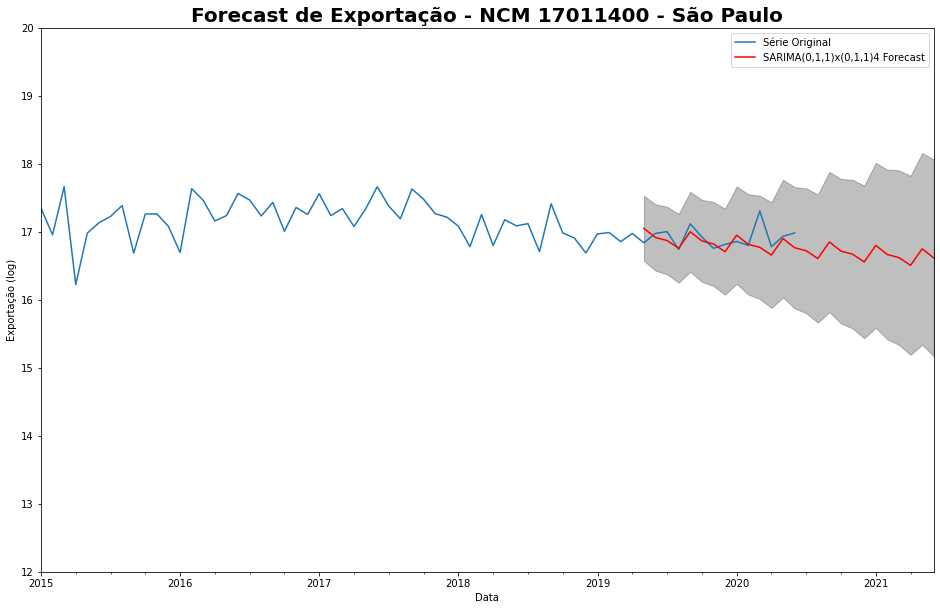

In [ ]:
#Plot

ax = media_sp_acucar_log.plot(label = 'Série Original')
predicao_1_ano.predicted_mean.plot(ax = ax, label = 'SARIMA(0,1,1)x(0,1,1)4 Forecast', color = 'red')
ax.fill_between(predicao_1_ano_conf.index,
                predicao_1_ano_conf.iloc[:,0],
                predicao_1_ano_conf.iloc[:,1],
                color = 'k',
                alpha = .25)

ax.set_xlabel('Data')
ax.set_ylabel('Exportação (log)')
ax.set_title('Forecast de Exportação - NCM 17011400 - São Paulo', fontsize = 20, fontweight = 'bold')
ax.set_ylim(12,20)
plt.legend(loc = 'best')
plt.show();

##**Conclusão**



Após a execução de 3 modelos diferentes amplamento utilizados para o forecast de séries temporais, observamos que o que obteve o melhor trade off entre AIC e RMSE foi o SARIMA(0,1,1) x (0,1,1,4).

Conseguimos concluir que há uma tendência de queda nos próximos meses pós pandemia, porém bem lenta. Os plots de autocorrelação conseguem nos mostrar que o nosso mês atual possui uma sazonalidade explicada por 4 meses anteriores, o que foi levado em conta ao aplicar o SARIMA.



Esse é o meu primeiro Projeto de séries temporais, e agradeço por terem lido até aqui. Gostaria de receber feedbacks sobre o que posso melhorar, o que posso agregar e etcs.

[LinkedIn](https://www.linkedin.com/in/arthurperalta/).
